# Fragmentation with Immigration and Exit Simulation


## Simulator Demo

### Importing Packages

In [1]:
import numpy as np
print('Numpy version is ' + str(np.__version__))
import scipy
from scipy import stats
print('Scipy version is ' + str(scipy.__version__))

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.collections import LineCollection
from matplotlib import animation, rc
print('Matplotlib version is ' + str(matplotlib.__version__))

import sklearn
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
print('Sklearn version is ' + str(sklearn.__version__))
import seaborn as sns
print('Seaborn version is ' + str(sns.__version__))
import pandas as pd
print('Pandas version is ' + str(pd.__version__))

import math

from Frag_Ex_Imm_Func import *
np.set_printoptions(precision=2)


Numpy version is 1.23.4


/Users/terencetsuiholung/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Scipy version is 1.7.3
Matplotlib version is 3.5.1
Sklearn version is 1.1.3
Seaborn version is 0.11.2
Pandas version is 1.4.2


### Try out the functions on Fragmentation Lists (Frag_List)

In [2]:
ex_max=2
ex_slope=4
frag_speed=1
N_split=2
a=1
b=1
alpha_f = 1
Nimm =1 
imm_rate = 3
Initial_Time = 0

help(Frag_List)

x=Frag_List(np.random.exponential(1,10),np.random.uniform(0,1,10))

print(x.Frag_labs)
print(x.age(1))

Event, Event_time = x.FragExIm(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Initial_Time, lin_ex=False)
print(Event, Event_time)
x.mean()
#print(x.cum_dist(5,10))
#print(x.cum_dist(5, 10, count=True))
#print(x.density(5), x.density(5,count=True))



Help on class Frag_List in module Frag_Ex_Imm_Func:

class Frag_List(builtins.object)
 |  Frag_List(Frag_lens, Frag_labs)
 |  
 |  Methods defined here:
 |  
 |  FragEx(self, ex_max, ex_slope, frag_speed, N_split, a, b, alpha_f, lin_ex=True, B_ex=1, alpha_e=0, x_max=1)
 |      FragExIm picks a fragmentation / exit by sampling the next event time, then proceeds to apply frag/ex process to the list of fragments. lin_ex = True if we assume linearity for exit rate.
 |  
 |  FragExIm(self, ex_max, ex_slope, frag_speed, N_split, a, b, alpha_f, Nimm, imm_rate, Initial_Time, lin_ex=True, B_ex=1, alpha_e=0, x_max=1, norm_imm=False, exp_imm=False, mu_i=0)
 |      FragExIm picks a fragmentation / exit / immigration by sampling the next event time, then proceeds to apply frag/imm/exit process to the list of fragments. lin_ex = True if we assume linearity for exit rate.
 |  
 |  __init__(self, Frag_lens, Frag_labs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __st

1.571240748297029

### Stationary Distribution Simulator
The stationary distribution simulator simulates the Fragmentation with Immigration and Exit Mechanism until it reaches mixing time. This is achieved by comparing the current state of the Markov process with the historical average state of the Markov process. When they are close in the Kolmogorov-Smirnov Distance, we will terminate the process and print out the stationary distribution. 

In the following codes, you can choose to print out the state of the Markov chain at each time step if you set plot=True functions. Furthermore, you can compute a weighted average if you set weighted = True.

In [3]:
help(stationary)

Help on function stationary in module Frag_Ex_Imm_Func:

stationary(x, ex_max, ex_slope, frag_speed, N_split, a, b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex=True, B_ex=1, alpha_e=0, weighted=False, plot=False, cfDNA=False, x_max=1, xlim_max=1, save_fig=False, norm_imm=False, exp_imm=False, mu_i=0)
    This function gives the stationary distribution of FragImmEx process if it reaches so before Step_Max time steps.
    Time_scale is the time we run our Markov process before updating KS distance. 
    N_Group gives the number of groups we put our fragments into according to their fragment lengths. 
    KS_threshold gives the threshold for the KS distance to be close.
    weighted gives weighted mean for faster convergence. 
    plot=True plots frequency distribution at each time step. 
    cfDNA = True rescales x axis to represent simulated cfDNA data.



#### Running one process to stationarity

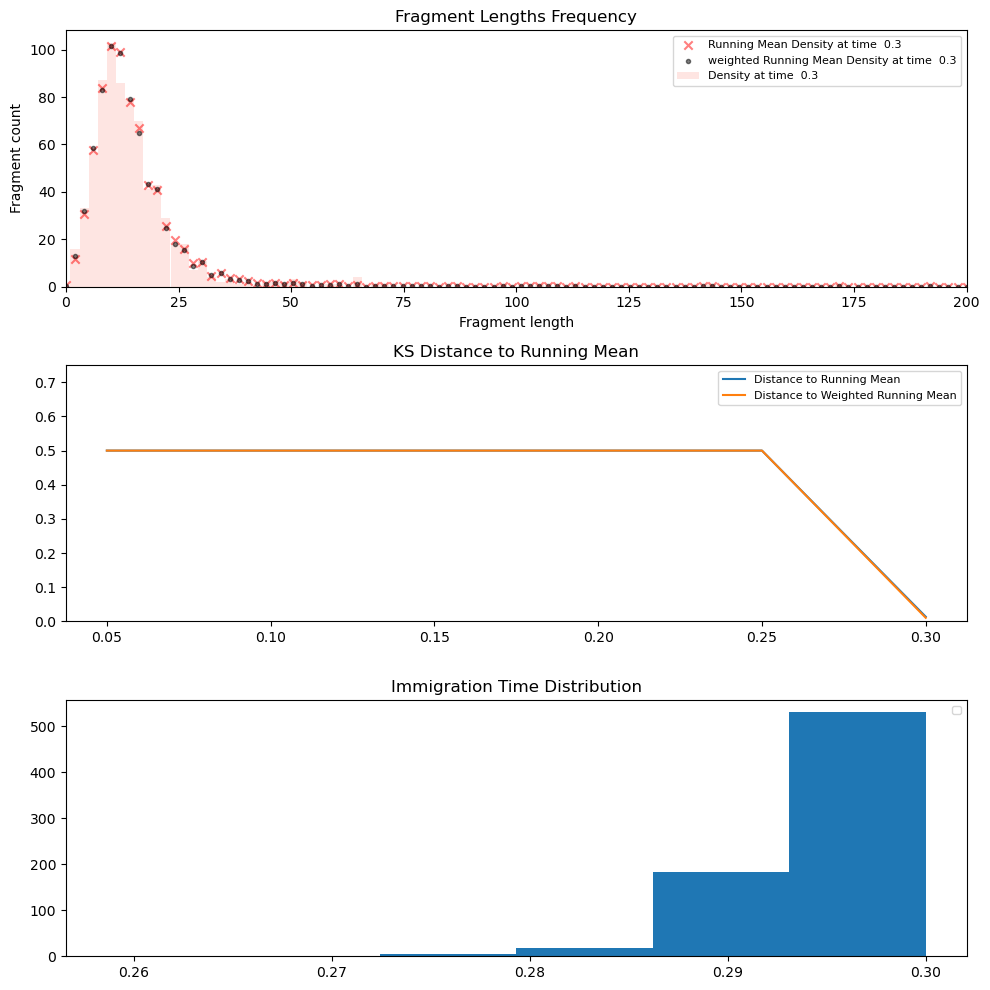

Equilibrium Reached = True, Mixing Time is  3.00e-01, Oldest Fragment immigrated at  2.59e-01
Equilibrium Reached = True, Mixing Time is 0.3000147320015818


/var/folders/dx/942l9g7s23b3wvb64nkf4yrw0000gn/T/ipykernel_13237/4021044601.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list = np.array([time, x.Frag_lens, station_count, seed, N_Group,  ex_max,ex_slope,frag_speed,N_split,a,b,alpha_f,Nimm,imm_rate,lin_ex,B_ex,alpha_e,x_max])


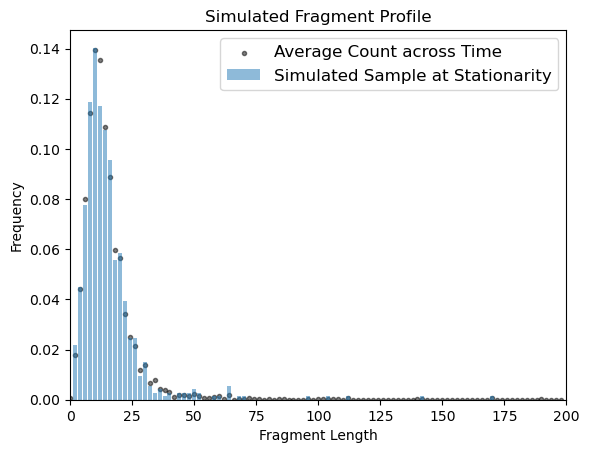

In [4]:
from datetime import datetime
time = int(datetime.timestamp(datetime.now()))
from Frag_Ex_Imm_Func import *
seed = 1
np.random.seed(seed)

################ Selecting Parmeters #################################
x_max=200
ex_max = 2*x_max
ex_slope = 10
B_ex = 30
frag_speed = 1
N_split = 2
a=1
b=1
alpha_f = 2
Nimm = 1
imm_rate = 100
KS_threshold = 0.05
Time_scale = 0.05  
N_Group = 100
Step_Max = 100
Prior_Count = 1
xlim_max=x_max
lin_ex=False
alpha_e=-2
#Prior_Count = 100
initial_condition = Frag_List(np.ones(Prior_Count)*B_ex + np.random.exponential(x_max/10,Prior_Count),np.zeros(Prior_Count))
print(initial_condition)
################ Running one FragExImm process to stationary distribution #################################
Equilibrium, Mixing_Time, station_count, x = stationary(initial_condition,ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, B_ex = B_ex, alpha_e = alpha_e,x_max=x_max, plot=True, xlim_max=x_max, lin_ex=lin_ex,  weighted=True)
print(f"Equilibrium Reached = {Equilibrium}, Mixing Time is {Mixing_Time}")
exp_dens = np.diff(station_count)/station_count[-1]
stat_dens = np.diff(x.cum_dist(N_Group,x_max))

plt.plot(figsize =(8,8))
plt.scatter(np.linspace(0,x_max,N_Group+1)[0:-1],exp_dens, label = f"Average Count across Time", color='k', marker = '.', alpha=0.5)
plt.bar(np.linspace(0,x_max,N_Group+1)[0:-1], stat_dens, label = f"Simulated Sample at Stationarity", alpha=0.5,width=0.8*x_max/N_Group)
plt.xlim([0,xlim_max])
plt.legend(loc=0, fontsize='large')
plt.xlabel('Fragment Length')
plt.ylabel('Frequency')
plt.title("Simulated Fragment Profile")
plt.savefig('../Simulation Output/One Process Simulation/Typical_Realisation_'+str(time)+'.png')

list = np.array([time, x.Frag_lens, station_count, seed, N_Group,  ex_max,ex_slope,frag_speed,N_split,a,b,alpha_f,Nimm,imm_rate,lin_ex,B_ex,alpha_e,x_max])
list.tofile('../Simulation Output/One Process Simulation/param_'+str(time)+'.csv', sep=',')


### Simulations Generator

With the class of simulations, one can sample multiple experiments with the same parameters configurations.

To efficiently simulate multiple samples of FragExImm processes with the same parameters, here we define a class called Simulation. The parameters of the simulations are those needed to run one simulation.

The function run_simulation with parameter N_sample efficiently runs the N_sample many simulations of the same input parameters. It will also aggregrate the observed count and produce the sample mean stationary distribution over all the samples with the same FragExIm parameters. 


In [5]:
help(Simulation)

Help on class Simulation in module Frag_Ex_Imm_Func:

class Simulation(builtins.object)
 |  Simulation(ex_max, ex_slope, frag_speed, N_split, a, b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex=True, B_ex=1, alpha_e=0, weighted=False, plot=False, cfDNA=False, x_max=1, xlim_max=1, peak=True, loglog=True, norm_imm=False, exp_imm=False, mu_i=0)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ex_max, ex_slope, frag_speed, N_split, a, b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex=True, B_ex=1, alpha_e=0, weighted=False, plot=False, cfDNA=False, x_max=1, xlim_max=1, peak=True, loglog=True, norm_imm=False, exp_imm=False, mu_i=0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  run_simulation(self, N_sample, plot=False)
 |      Produce N_sample many samples with the parameters given by self.
 |  
 |  --------------------------------------------

#### Running one simulation

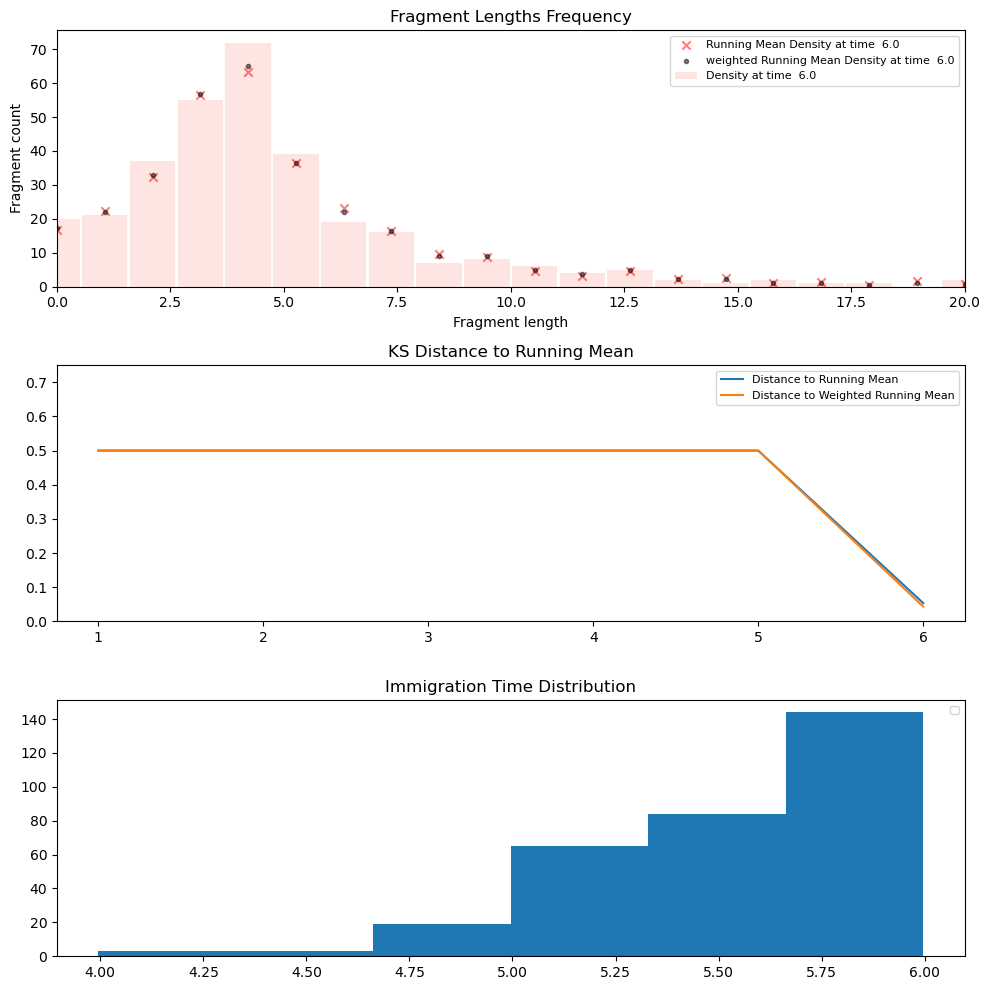

Equilibrium Reached = True, Mixing Time is  6.00e+00, Oldest Fragment immigrated at  4.00e+00
20 4 [71.56 39.56 24.72 14.24 10.2   8.    5.12  3.6   3.6   3.16  2.24  1.8
  1.2   1.32  0.92  0.88]
Sample mean stationary count: [  0.    18.04  40.84  73.72 133.04 204.6  244.16 268.88 283.12 293.32
 301.32 306.44 310.04 313.64 316.8  319.04 320.84 322.04 323.36 324.28
 325.16]


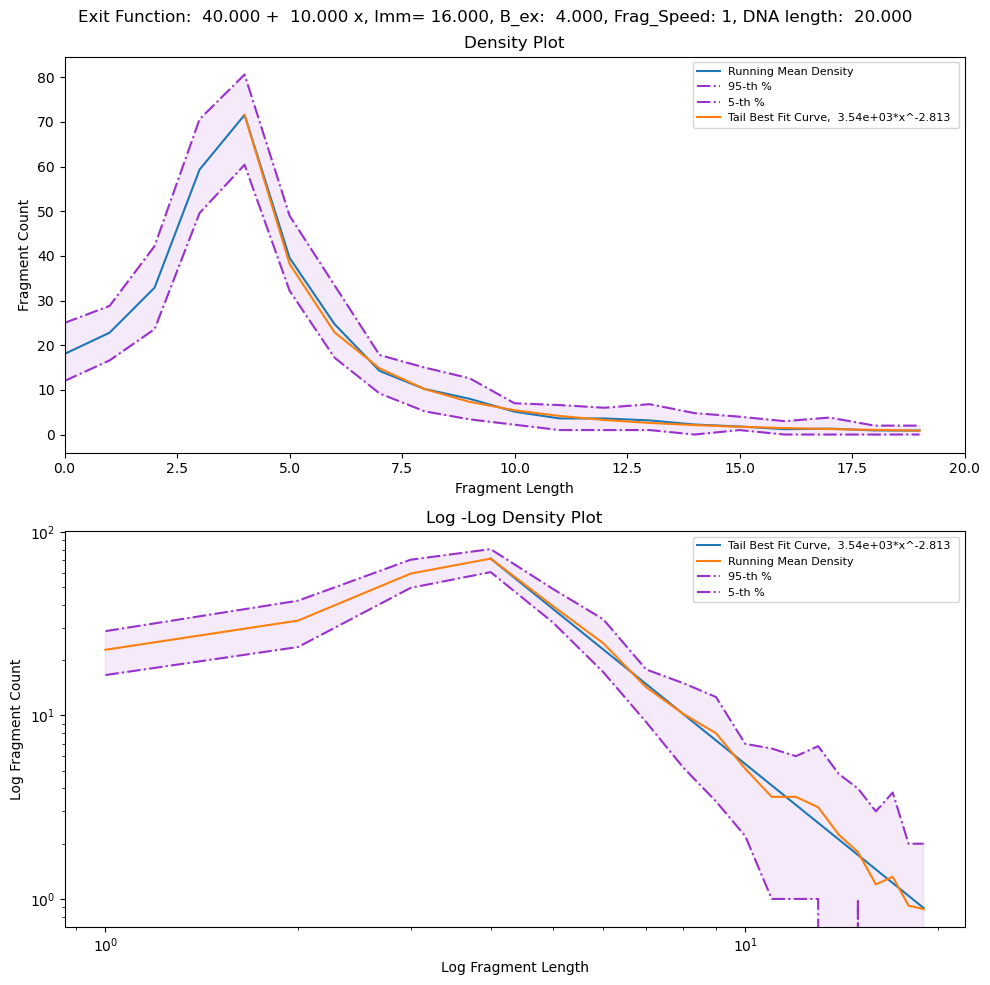

In [6]:
from Frag_Ex_Imm_Func import *
np.random.seed(1)
################ Selecting Parmeters #################################
x_max=20
ex_max = 2*x_max
ex_slope = 10
B_ex = ex_max/ex_slope
frag_speed = 1
N_split = 2
a=1
b=1
alpha_f = 1
Nimm = 1
imm_rate = 0.8*x_max
KS_threshold = 0.05
Time_scale = 1
N_Group = x_max
Step_Max = 100
Prior_Count = 1
xlim_max=x_max
#Prior_Count = 100
initial_condition = Frag_List(np.ones(Prior_Count)*x_max,np.zeros(Prior_Count))
print(initial_condition)
N_sim = 10
y= Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, weighted = True, lin_ex= True, x_max=x_max, xlim_max=xlim_max, plot=True)
sim_mat, Station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim, plot = True)
print(f"Sample mean stationary count: {Station_mean}")

## Simulation Result I - Varying Exit Mechanism
In this section we study uniform fragmentation process, i.e. a = b = alpha_f =1.

We investigate how the shape of the long-term fragmentation length profile varies with respect to different exit mechanisms.

In [7]:
a=1
b=1
alpha_f =1


#### Constant Rate of Exit (CON)

Configuration: 1
ex_max: 1, ex_slope: 1e-05, imm_rate: 500
Number of Immigrants = 1, Time_Scale = 1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  6.00e+00, Oldest Fragment immigrated at  1.62e-01
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  1.00e+01, Oldest Fragment immigrated at  2.20e-01
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  7.01e+00, Oldest Fragment immigrated at  3.03e-01
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  8.00e+00, Oldest Fragment immigrated at  5.09e-01
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  8.00e+00, Oldest Fragment immigrated at  3.46e-01
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  1.40e+01, Oldest Fragment immigrated at  3.97e+00
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  7.01e+00, Oldest Fragment immigrated at  1.28e-01
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  9.00e+00, Olde

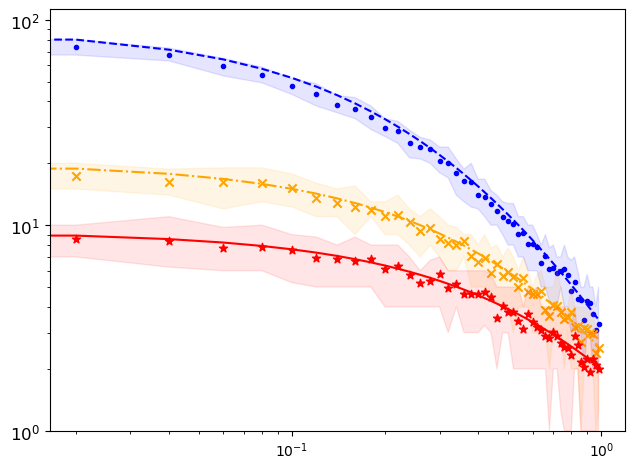

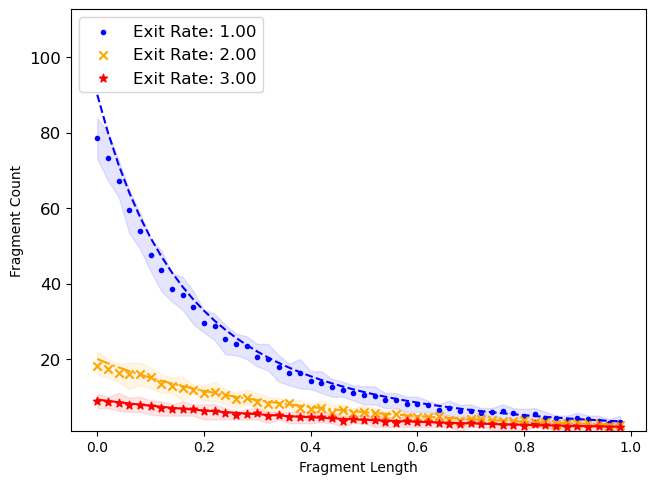

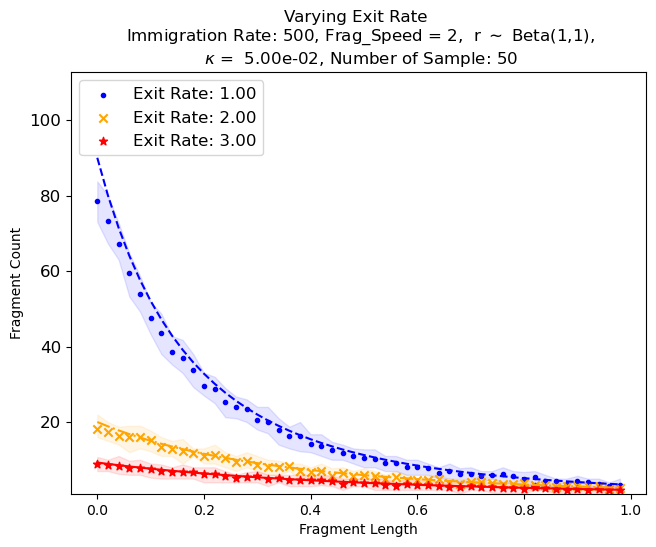

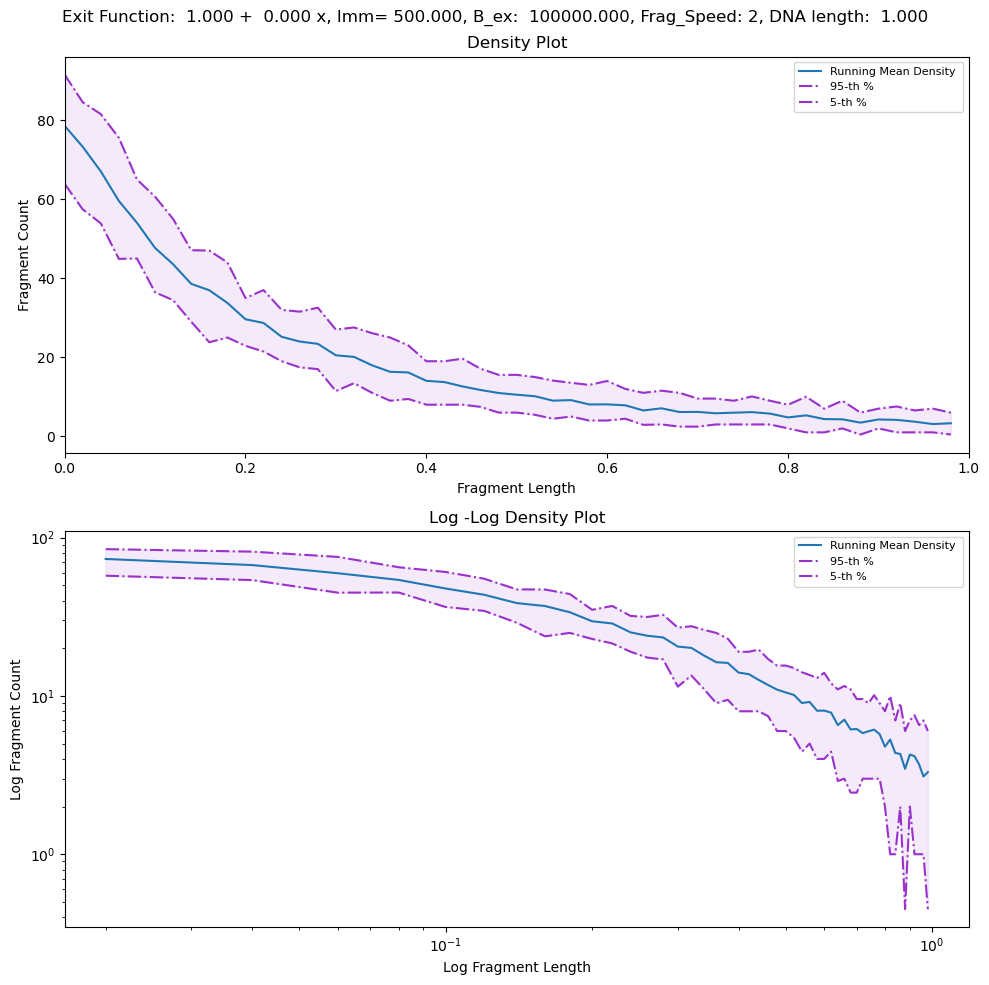

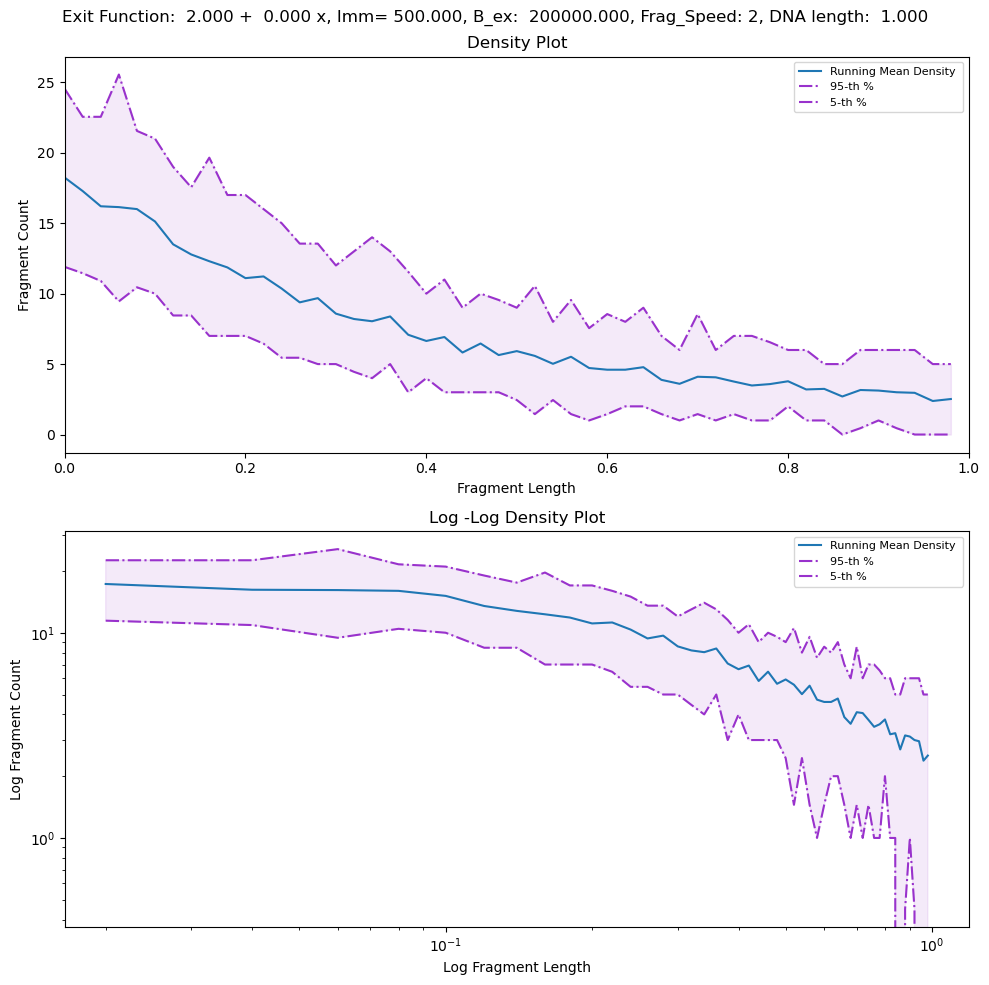

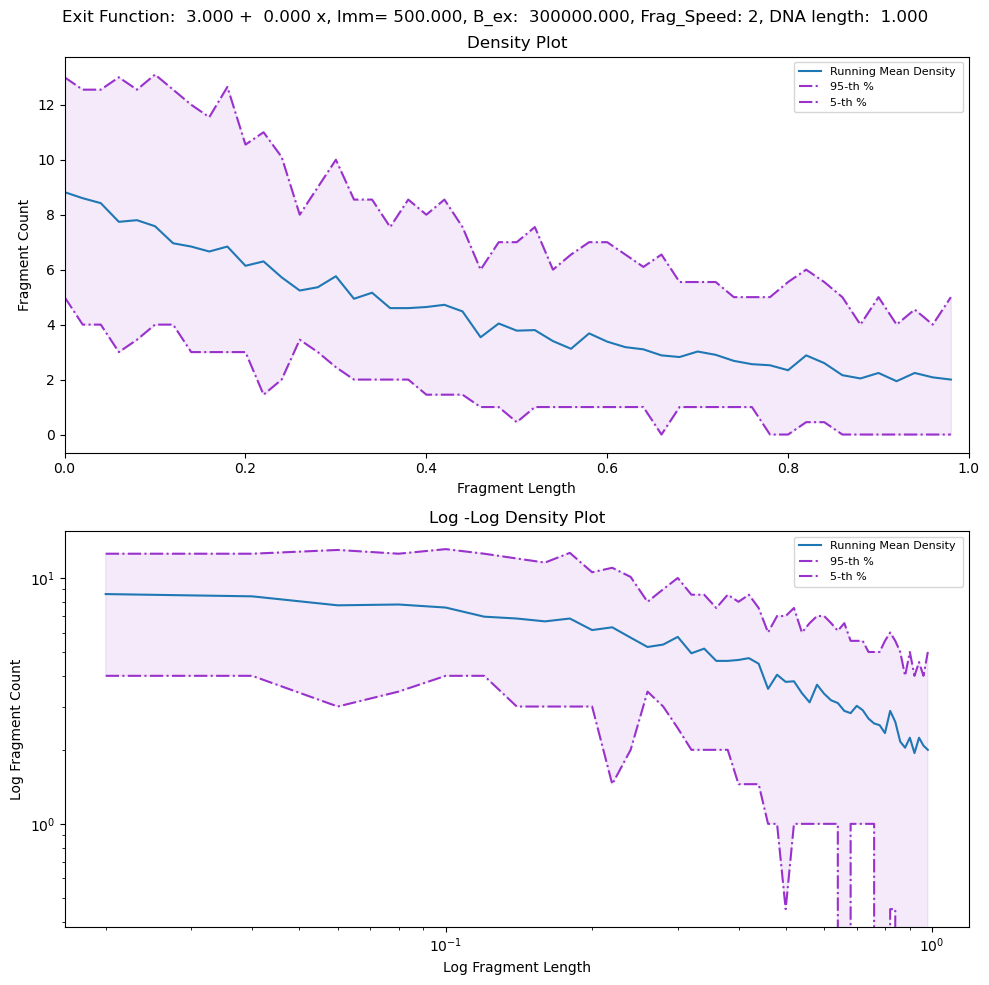

In [11]:
import pandas as pd 
from Frag_Ex_Imm_Func import *
np.random.seed(1)
a =1
b=1
alpha_f = 1
ex_max = 1
ex_slope = 0.00001
frag_speed = 2
N_split = 2
Nimm = 1
imm_rate = 500
KS_threshold = 0.05
Time_scale = 1
N_Group = 50
Step_Max = 100
counter = 0
N_config = 3
N_sim = 50
Simulation_Data = []
Graph_Data = []
fig  = plt.figure()
ax = fig.gca()
color_list = ['b','orange','r']
marker_list = ['.','x','*']
linestyle_list = ['dashed','dashdot','solid']
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]      
      counter += 1
      B_ex = ex_max/ex_slope
      print(f"Configuration: {counter}")
      print(f"ex_max: {ex_max}, ex_slope: {ex_slope}, imm_rate: {imm_rate}")
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, x_max = 1, lin_ex=True, peak=True, weighted = True, loglog=False)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim, plot=True)
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)
      x_axis = np.linspace(0,1,N_Group+1)[:-1]
      Best_fit = imm_rate*(frag_speed+ex_max)**2*1/(frag_speed*x_axis+ ex_max)**3/N_Group
      ax.scatter(x_axis, np.diff(station_mean), marker=marker, color= color, label=f'Exit Rate: {ex_max:.2f}')
      ax.plot(x_axis, Best_fit, linestyle=linestyle, color=color)
      #ax.plot(x_axis, Best_fit, label = f'Exit Rate: {ex_max}, Best Fit: {imm_rate}*{frag_speed + ex_max}^2*({frag_speed}x + {ex_max})^(-3)')
      #ax[1].scatter(np.log(x_axis), np.log(np.diff(station_mean)*N_Group), alpha = 0.5)
      #ax[1].plot(np.log(x_axis), np.log(Best_fit), label = f'Exit Rate: {ex_max: .2f}, Best Fit: -3 log({frag_speed: .2f} x + {ex_max: .2f})+ log({imm_rate:.2f}*{frag_speed + ex_max: .2f}^-2)')
      #ax[1].set_title('log Frequency vs log Length')
      #ax.plot(x_axis,up_bound, linestyle='-.', color = color, alpha=0.25)
      #ax.plot(x_axis,low_bound, linestyle='-.', color = color, alpha=0.25)
      ax.fill_between(x_axis, low_bound, up_bound, alpha=0.1, color=color)      
      ax.set_yscale('log')
      ax.set_xscale('log')
      fig.tight_layout()
      Graph_Data.append(np.diff(station_mean)*N_Group)
      #pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/Vary_Constant_Exit.csv')
      #ax[1].legend()
      #ax[1].set_xlim([np.log(B_ex), 0])
      #ax[1].set_ylim([-4, 9])
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      #print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      #Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, beta,c, sample_mean_age, mode, gamma])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))
      ex_max = ex_max + 1
ax.yaxis.set_tick_params(labelsize='large')
ax.set_ylim(bottom=1)
display(fig)
fig.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_Constant_Exit_log.png',bbox_inches='tight')
fig.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_Constant_Exit_log.pdf', format="pdf",bbox_inches='tight')
ax.set_ylabel('Fragment Count')
ax.set_xlabel('Fragment Length')
#ax.set_title('Frequency Profile')
ax.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
ax.set_yscale('linear')
ax.set_xscale('linear')
ax.yaxis.set_tick_params(labelsize='large')
display(fig)
fig.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_Constant_Exit_clean.png',bbox_inches='tight')
fig.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_Constant_Exit_clean.pdf', format="pdf",bbox_inches='tight')
#png2 = Image.open(png1)
ax.set_title(f'Varying Exit Rate \n Immigration Rate: {imm_rate}, Frag_Speed = {frag_speed},  r $\sim$ Beta({a},{b}), \n $\kappa$ = {KS_threshold: .2e}, Number of Sample: {N_sim}')
fig.savefig('../Simulation Output/Numerical experiments/Vary_Constant_Exit.png',bbox_inches='tight')
fig.savefig('../Simulation Output/Numerical experiments/Vary_Constant_Exit.pdf', format="pdf",bbox_inches='tight')


#### Power decay with No Boundary (PNB)

We now consider the power model, where the exit mechanism is given by $E(x)=x^{\alpha_e}$.
We fix $B_{ex}$ and vary $\alpha_e$.

Configuration: 1
Number of Immigrants = 1, Time_Scale = 0.01
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  3.73e+00, Oldest Fragment immigrated at  1.16e+00
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  2.33e+00, Oldest Fragment immigrated at  6.88e-02
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  5.09e+00, Oldest Fragment immigrated at  1.89e+00
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  4.68e+00, Oldest Fragment immigrated at  9.59e-01
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  3.68e+00, Oldest Fragment immigrated at  1.17e+00
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  5.43e+00, Oldest Fragment immigrated at  2.95e+00
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  4.20e+00, Oldest Fragment immigrated at  1.41e+00
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  3.23e+00, Oldest Fragment immigrated at  1.65e-01
Exp

/var/folders/dx/942l9g7s23b3wvb64nkf4yrw0000gn/T/ipykernel_56897/3146149954.py:85: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0,50])


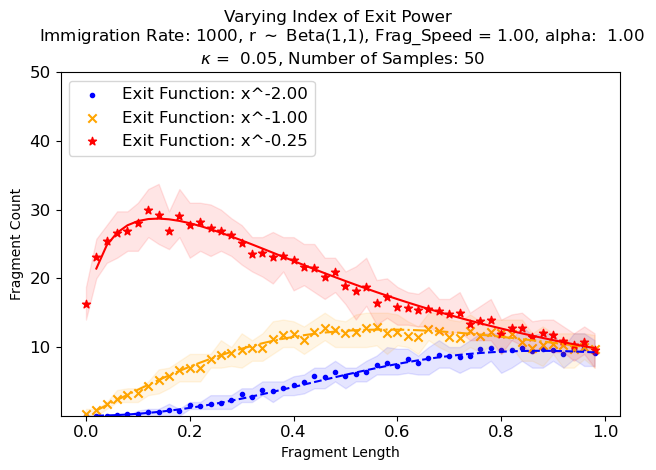

In [13]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a =1
b=1
alpha_f = 1.0
alpha_e = -2.0
ex_slope = 4
B_ex=10**16  ##Setting high B_ex value will automatically set E(x)=x^{alpha_e} only
ex_max = B_ex * ex_slope
frag_speed = 1
N_split = 2
Nimm = 1
imm_rate = 1000
ratio = 0.05
KS_threshold = 0.05
Time_scale = 0.01
N_Group = 50
Step_Max = 5000
counter = 0
N_config = 3
N_sim = 50
Simulation_Data = []
Graph_Data = []
power_list = [-2,-1,-0.25]
color_list = ['b','orange','r']
marker_list = ['.','x','*']
linestyle_list = ['dashed','dashdot','solid']
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
#fig, ax = plt.subplots(2, figsize=(16,8))
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      alpha_e=power_list[counter]
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]
      counter += 1
      print(f"Configuration: {counter}")
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, x_max = 1, peak=False, alpha_e=alpha_e, lin_ex=False, B_ex=B_ex)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      x_axis = np.linspace(0,1,N_Group+1)[:-1]
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)
      plt.scatter(x_axis, np.diff(station_mean), marker = marker, label=f'Exit Function: x^{alpha_e: .2f}', color= color)
      #plt.plot(x_axis,up_bound, linestyle='-.', alpha=0.25, color = color)
      #plt.plot(x_axis,low_bound, linestyle='-.', alpha=0.25, color = color)
      plt.fill_between(x_axis, low_bound, up_bound, alpha=0.1, color=color)
      norm_constant =  np.diff(station_mean)[-1]/(frag_speed+1)**((3-alpha_e)/(alpha_e-1))
      plt.plot(x_axis[1:], norm_constant*x_axis[1:]**(-alpha_e)*(frag_speed*x_axis[1:]**(1-alpha_e)+1)**((3-alpha_e)/(alpha_e-1)), color=color, linestyle=linestyle)      
      #ax[1,counter-1].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = '0.8',label='Upper Quartile')
      #ax[1,counter-1].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = '0.8',label='Lower Quartile')
      #ax[1,counter-1].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = '0.5')      
      #ax[1,counter-1].scatter(x_axis, np.diff(station_mean), label = 'Mean', marker = 'x')
      #ax[1,counter-1].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
      #ax[1,counter-1].set_ylabel('log Fragment Count')
      #ax[1,counter-1].set_xlabel('log Fragment Length')
      #ax[1,counter-1].set_xscale('log')
      #ax[1,counter-1].set_yscale('log')
      #ax[0].set_title(f'Frequency Profile, Exit Function: {ex_max}- {ex_slope}x')
      #ax[1,counter-1].set_title(f'Frequency Profile (log-log), Exit Function: {ex_max}- {ex_slope}x')
      #ax[1,counter-1].set_xlim([0.1,1])
      #ax[1,counter-1].legend()
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/Varying Exit Power.csv')
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      #print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      beta = 0
      c = 0
      if B_ex < 1:
        log_den, log_x_axis, beta, c = tail_loglog_fit(np.diff(station_mean),1,B_ex, peak=False)
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, beta,c, sample_mean_age, mode, gamma])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))ax[0].plot(x_axis[9:-1], imm_rate/frag_speed*x_axis[10:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
        #ax[1].set_xlim([np.log(B_ex), 0])
      #ax[1].set_ylim([-4, 9])
#plt.axvline(x=B_ex, color = 'k', label=f'x={B_ex}')
#plt.plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize='large')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Varying Exit Power log.png',bbox_inches='tight')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Varying Exit Power log.pdf', format="pdf",bbox_inches='tight')
plt.ylabel('Fragment Count')
plt.xlabel('Fragment Length')
plt.ylim([0,50])
plt.xscale('linear')
plt.yscale('linear')
plt.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
plt.tight_layout()
plt.tick_params(labelsize='large')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Varying Exit Power Clean.png',bbox_inches='tight')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Varying Exit Power Clean.pdf', format="pdf",bbox_inches='tight')

plt.title(f'Varying Index of Exit Power \n Immigration Rate: {imm_rate}, r $\sim$ Beta({a},{b}), Frag_Speed = {frag_speed :.2f}, alpha: {alpha_f: .2f} \n $\kappa$ = {KS_threshold: .2f}, Number of Samples: {N_sim}')
plt.tight_layout()
plt.savefig('../Simulation Output/Numerical experiments/Varying Exit Power.png',bbox_inches='tight')
plt.savefig('../Simulation Output/Numerical experiments/Varying Exit Power.pdf', format="pdf",bbox_inches='tight')


#### Power decay with Fixed Boundary (PFB)

We now consider the power model, where the exit mechanism is given by $E(x)=x^{\alpha_e}-B_{ex}^{\alpha_e}$.

We fix $B_{ex}$ and vary $\alpha_e$.

Configuration: 1
Number of Immigrants = 1, Time_Scale = 0.01
Experiment: 1, Seed: 1
Equilibrium Reached = False, Mixing Time is  1.06e+01, Oldest Fragment immigrated at  4.45e-02
Experiment: 2, Seed: 2
Equilibrium Reached = False, Mixing Time is  1.06e+01, Oldest Fragment immigrated at  8.51e-02
Experiment: 3, Seed: 3
Equilibrium Reached = False, Mixing Time is  1.06e+01, Oldest Fragment immigrated at  7.56e-02
Experiment: 4, Seed: 4
Equilibrium Reached = False, Mixing Time is  1.06e+01, Oldest Fragment immigrated at  3.10e-02
Experiment: 5, Seed: 5
Equilibrium Reached = False, Mixing Time is  1.06e+01, Oldest Fragment immigrated at  0.00e+00
Experiment: 6, Seed: 6
Equilibrium Reached = False, Mixing Time is  1.06e+01, Oldest Fragment immigrated at  1.15e-02
Experiment: 7, Seed: 7
Equilibrium Reached = False, Mixing Time is  1.05e+01, Oldest Fragment immigrated at  0.00e+00
Experiment: 8, Seed: 8
Equilibrium Reached = False, Mixing Time is  1.06e+01, Oldest Fragment immigrated at  2.29

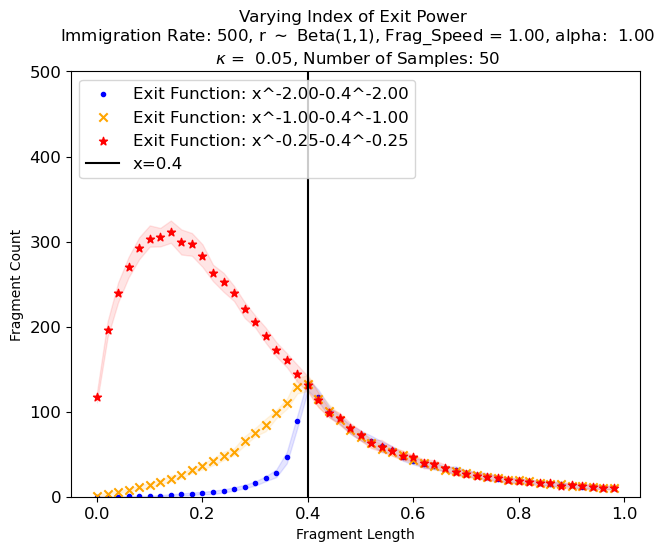

In [14]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a =1
b=1
alpha_f = 1.0
alpha_e = -2.0
ex_slope = 4
B_ex=0.4
ex_max = B_ex * ex_slope
frag_speed = 1
N_split = 2
Nimm = 1
imm_rate = 500
ratio = 0.05
KS_threshold = 0.05
Time_scale = 0.01
N_Group = 50
Step_Max = 1000
counter = 0
N_config = 3
N_sim = 50
Simulation_Data = []
Graph_Data = []
power_list = [-2,-1,-0.25]
color_list = ['b','orange','r']
marker_list = ['.','x','*']
linestyle_list = ['dashed','dashdot','solid']
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
#fig, ax = plt.subplots(2, figsize=(16,8))
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      alpha_e=power_list[counter]
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]
      counter += 1
      print(f"Configuration: {counter}")
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, x_max = 1, peak=False, alpha_e=alpha_e, lin_ex=False, B_ex=B_ex)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      x_axis = np.linspace(0,1,N_Group+1)[:-1]
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)
      plt.scatter(x_axis, np.diff(station_mean), marker = marker, label=f'Exit Function: x^{alpha_e: .2f}-{B_ex}^{alpha_e:.2f}', color= color)
#      plt.plot(x_axis,up_bound, linestyle='-.', alpha=0.25, color = color)
#      plt.plot(x_axis,low_bound, linestyle='-.', alpha=0.25, color = color)
      plt.fill_between(x_axis, low_bound, up_bound, alpha=0.1, color=color)
      #ax[1,counter-1].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = '0.8',label='Upper Quartile')
      #ax[1,counter-1].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = '0.8',label='Lower Quartile')
      #ax[1,counter-1].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = '0.5')      
      #ax[1,counter-1].scatter(x_axis, np.diff(station_mean), label = 'Mean', marker = 'x')
      #ax[1,counter-1].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
      #ax[1,counter-1].set_ylabel('log Fragment Count')
      #ax[1,counter-1].set_xlabel('log Fragment Length')
      #ax[1,counter-1].set_xscale('log')
      #ax[1,counter-1].set_yscale('log')
      #ax[0].set_title(f'Frequency Profile, Exit Function: {ex_max}- {ex_slope}x')
      #ax[1,counter-1].set_title(f'Frequency Profile (log-log), Exit Function: {ex_max}- {ex_slope}x')
      #ax[1,counter-1].set_xlim([0.1,1])
      #ax[1,counter-1].legend()
      plt.tight_layout()
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/Varying Exit Power Fixed Boundary.csv')
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      #print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      beta = 0
      c = 0
      if B_ex < 1:
        log_den, log_x_axis, beta, c = tail_loglog_fit(np.diff(station_mean),1,B_ex, peak=False)
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, beta,c, sample_mean_age, mode, gamma])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))ax[0].plot(x_axis[9:-1], imm_rate/frag_speed*x_axis[10:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
        #ax[1].set_xlim([np.log(B_ex), 0])
      #ax[1].set_ylim([-4, 9])
plt.axvline(x=B_ex, color = 'k', label=f'x={B_ex}')
#plt.plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize='large')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Varying Exit Power Fixed Boundary log.png',bbox_inches='tight')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Varying Exit Power Fixed Boundary log.pdf', format="pdf",bbox_inches='tight')
plt.xscale('linear')
plt.yscale('linear')
plt.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
plt.tight_layout()
plt.ylim([0,500])
plt.tick_params(labelsize='large')
plt.ylabel('Fragment Count')
plt.xlabel('Fragment Length')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Varying Exit Power Fixed Boundary Cleaned.png',bbox_inches='tight')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Varying Exit Power Fixed Boundary Cleaned.pdf', format="pdf",bbox_inches='tight')

plt.title(f'Varying Index of Exit Power \n Immigration Rate: {imm_rate}, r $\sim$ Beta({a},{b}), Frag_Speed = {frag_speed :.2f}, alpha: {alpha_f: .2f} \n $\kappa$ = {KS_threshold: .2f}, Number of Samples: {N_sim}')
plt.savefig('../Simulation Output/Numerical experiments/Varying Exit Power Fixed Boundary.png',bbox_inches='tight')
plt.savefig('../Simulation Output/Numerical experiments/Varying Exit Power Fixed Boundary.pdf', format="pdf",bbox_inches='tight')


#### Supplementary Result - Size Dependent Exit Mechanism, Linear Model

First we vary the slope of the linear model.

In [ ]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a =1
b=1
alpha_f = 1
ex_max = 10
frag_speed = 1
N_split = 2
Nimm = 1
imm_rate = 100
KS_threshold = 0.025
Time_scale = 1
N_Group = 50
Step_Max = 1000
counter = 0
N_config = 2
N_sim = 50
Simulation_Data = []
Graph_Data=[]
slope_list = [20,50]
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
fig, ax = plt.subplots(2,N_config, figsize=(12,8))
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      ex_slope = slope_list[counter]
      counter += 1
      B_ex = ex_max/ex_slope
      print(f"Configuration: {counter}")
      print(f"ex_max: {ex_max}, ex_slope: {ex_slope}, imm_rate: {imm_rate}")
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, x_max = 1, peak=False)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim, plot=True)
      x_axis = np.linspace(0,1,N_Group+1)[:-1]
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)
      ax[0,counter-1].scatter(x_axis, np.diff(station_mean), marker = 'x', color = 'k', label='Mean')
      #ax[0,counter-1].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = '0.8', label='Upper Quartile')
      #ax[0,counter-1].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = '0.8', label='Lower Quartile')
      ax[0,counter-1].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = '0.5')      
      #ax[1,counter-1].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = '0.8',label='Upper Quartile')
      #ax[1,counter-1].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = '0.8',label='Lower Quartile')
      ax[1,counter-1].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = '0.5')      
      ax[1,counter-1].scatter(x_axis, np.diff(station_mean), label = 'Mean', marker = 'x')
      ax[0,counter-1].axvline(x=B_ex, color = 'k', label=f'x={B_ex}')
      #ax[0,counter-1].plot(x_axis[9:-1], imm_rate/frag_speed*x_axis[10:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
      #ax[1,counter-1].plot(x_axis[9:-1], imm_rate/frag_speed*x_axis[10:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
      ax[0,counter-1].set_ylabel('Fragment Count')
      ax[0,counter-1].set_xlabel('Fragment Length')
      ax[1,counter-1].set_ylabel('log Fragment Count')
      ax[1,counter-1].set_xlabel('log Fragment Length')
      ax[1,counter-1].set_xscale('log')
      ax[1,counter-1].set_yscale('log')
      ax[0,counter-1].set_title(f'Frequency Profile, Exit Function: {ex_max}- {ex_slope}x')
      ax[1,counter-1].set_title(f'Frequency Profile (log-log), Exit Function: {ex_max}- {ex_slope}x')
      ax[1,counter-1].set_xlim([0.1,1])
      ax[0,counter-1].legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
      ax[1,counter-1].legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
      fig.suptitle(f' Varying Exit Slope \n Immigration Rate: {imm_rate}, r $\sim$ Beta({a},{b}), Frag_Speed = {frag_speed}, alpha =  {alpha_f}\n $\kappa$ = {KS_threshold: .3f}, Number of Samples: {N_sim}')
      fig.tight_layout()
      display(fig)
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/Fix_c_vary_m_exit.csv')
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      #print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      beta = 0
      c = 0
      if B_ex < 1:
        log_den, log_x_axis, beta, c = tail_loglog_fit(np.diff(station_mean),1,B_ex, peak=False)
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, beta,c, sample_mean_age, mode, gamma])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))ax[0].plot(x_axis[9:-1], imm_rate/frag_speed*x_axis[10:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
        #ax[1].set_xlim([np.log(B_ex), 0])
      #ax[1].set_ylim([-4, 9])
fig.savefig('../Simulation Output/Numerical experiments/Fix_c_vary_m_exit.png')
fig.savefig('../Simulation Output/Numerical experiments/Fix_c_vary_m_exit.pdf', format="pdf",bbox_inches='tight')

Now we vary the slope of the linear model while fixing the exit boundary.

In [ ]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a =1
b=1
alpha_f = 1
ex_max = 10
frag_speed = 1
N_split = 2
Nimm = 1
imm_rate = 100
KS_threshold = 0.05
Time_scale = 1
N_Group = 50
Step_Max = 100
counter = 0
N_config = 3
N_sim = 50
Simulation_Data = []
Graph_Data=[]
slope_list = [2,3,4]
B_ex=0.4
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
#fig, ax = plt.subplots(2, figsize=(16,8))
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      ex_slope = slope_list[counter]
      counter += 1
      ex_max = B_ex*ex_slope
      print(f"Configuration: {counter}")
      print(f"ex_max: {ex_max}, ex_slope: {ex_slope}, imm_rate: {imm_rate}")
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, x_max = 1, peak=False)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      x_axis = np.linspace(0,1,N_Group+1)[:-1]
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)
      plt.scatter(x_axis, np.diff(station_mean), marker = 'x', label=f'Mean, Exit Function = {ex_max:.1f}-{ex_slope: .1f}x')
      #plt.plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = '0.8')
      #plt.plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = '0.8')
      plt.fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = '0.5')
      x_left = np.linspace(0,1,N_Group+1)[:int(N_Group*B_ex)+1]
      norm_constant = (imm_rate / frag_speed * B_ex ** (-alpha_f-2))/(B_ex+B_ex*(frag_speed/ex_slope-1))**((ex_slope-3*frag_speed)/(frag_speed-ex_slope))/N_Group
      plt.plot(x_left, norm_constant*(B_ex+x_left*(frag_speed/ex_slope-1))**((ex_slope-3*frag_speed)/(frag_speed-ex_slope)))      
      #ax[1,counter-1].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = '0.8',label='Upper Quartile')
      #ax[1,counter-1].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = '0.8',label='Lower Quartile')
      #ax[1,counter-1].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = '0.5')      
      #ax[1,counter-1].scatter(x_axis, np.diff(station_mean), label = 'Mean', marker = 'x')
      #ax[1,counter-1].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
      plt.ylabel('Fragment Count')
      plt.xlabel('Fragment Length')
      #plt.yscale('log')
      #ax[1,counter-1].set_ylabel('log Fragment Count')
      #ax[1,counter-1].set_xlabel('log Fragment Length')
      #ax[1,counter-1].set_xscale('log')
      #ax[1,counter-1].set_yscale('log')
      #ax[0].set_title(f'Frequency Profile, Exit Function: {ex_max}- {ex_slope}x')
      #ax[1,counter-1].set_title(f'Frequency Profile (log-log), Exit Function: {ex_max}- {ex_slope}x')
      #ax[1,counter-1].set_xlim([0.1,1])
      #ax[1,counter-1].legend()
      plt.title(f' Varying Exit Function with Fixed Boundary \n Immigration Rate: {imm_rate}, r $\sim$ Beta({a},{b}), Frag_Speed = {frag_speed}, alpha = {alpha_f} \n  $\kappa$ = {KS_threshold: .2f}, Number of Samples: {N_sim}')
      plt.tight_layout()
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/Varying Slope Fixed Boundary.csv')
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      #print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      beta = 0
      c = 0
      if B_ex < 1:
        log_den, log_x_axis, beta, c = tail_loglog_fit(np.diff(station_mean),1,B_ex, peak=False)
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, beta,c, sample_mean_age, mode, gamma])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))ax[0].plot(x_axis[9:-1], imm_rate/frag_speed*x_axis[10:]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
        #ax[1].set_xlim([np.log(B_ex), 0])
      #ax[1].set_ylim([-4, 9])
plt.axvline(x=B_ex, color = 'k', label=f'x={B_ex}')
plt.plot(x_axis[int(N_Group*B_ex):], imm_rate/frag_speed*x_axis[int(N_Group*B_ex):]**-3/N_Group, label=f'Best Fit: {imm_rate/frag_speed} x^{-3}')
plt.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
plt.savefig('../Simulation Output/Numerical experiments/Varying Slope Fixed Boundary.png')
plt.savefig('../Simulation Output/Numerical experiments/Varying Slope Fixed Boundary.pdf', format="pdf",bbox_inches='tight')

## Simulation Result II - Varying Fragmentation Mechanism

### Fragmentation Rate and Immigration Speed

#### Fragmentation Rate and Peak Position

Here we fix immigration and exit rate, and simply vary the fragmentation rate. One can see that the mode count is inversely proportional to the fragmentation rate. 

Number of Immigrants = 1, Time_Scale = 0.1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  2.03e+01, Oldest Fragment immigrated at  2.22e+00
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  2.26e+01, Oldest Fragment immigrated at  1.96e+00
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  1.54e+01, Oldest Fragment immigrated at  0.00e+00
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  1.81e+01, Oldest Fragment immigrated at  7.71e-01
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  1.72e+01, Oldest Fragment immigrated at  1.82e-01
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  1.84e+01, Oldest Fragment immigrated at  1.39e+00
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  2.41e+01, Oldest Fragment immigrated at  5.42e+00
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  1.70e+01, Oldest Fragment immigrated at  9.99e-02
Experiment: 9, Seed: 

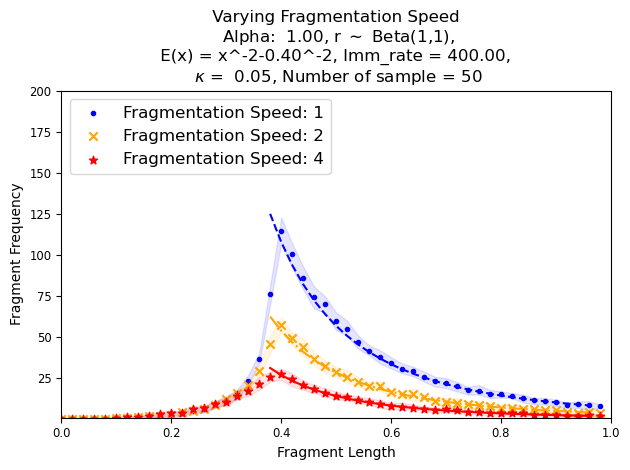

In [16]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a=1
b=1
ex_max=1
x_max=1
xlim_max=1
alpha_f = 1.0
alpha_e = -2
B_ex=0.4*x_max
ex_slope = 2
imm_rate = 400
N_split = 2
Nimm = 1
KS_threshold = 0.05
Time_scale = 0.1
N_Group = 50
Step_Max = 500
counter = 0
N_config = 3
N_sim = 50
Simulation_Data = []
Graph_Data = []
x_axis = np.linspace(0,x_max,N_Group+1)[:-1]
ex_id = int(B_ex)
tail_x = np.linspace(0,x_max,N_Group+1)[ex_id:-1]
color_list = ['b','orange','r']
marker_list = ['.','x','*']
linestyle_list = ['dashed','dashdot','solid']
frag_list = [1,2,4]
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      frag_speed = frag_list[counter]
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]
      counter += 1
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex = False, alpha_e = alpha_e, B_ex = B_ex, weighted=True, x_max=x_max,xlim_max=xlim_max, peak=True)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)
      plt.scatter(x_axis, np.diff(station_mean), marker = marker, label=f'Fragmentation Speed: {frag_speed}', color= color)
      #plt.plot(x_axis,up_bound, linestyle='-.', alpha=0.25, color = color)
      #plt.plot(x_axis,low_bound, linestyle='-.', alpha=0.25, color = color)
      plt.fill_between(x_axis, low_bound, up_bound, alpha=0.1, color=color)
      plt.plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**-3/N_Group, linestyle=linestyle, color=color)
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/Vary_frag.csv')
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, a,b,alpha_f, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, mode, beta, gamma , sample_mean_age])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))
      #alpha_f = alpha_f - 0.5
      #ex_slope = ex_slope * 1.2
      #imm_rate = imm_rate + 10
      #frag_speed = frag_speed * 2
      #Time_scale = Time_scale / 2 
#plt.legend()
plt.xlim([0.4,1])
plt.ylim([1,200])
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize='large')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_frag_clean_log.png')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_frag_clean_log.pdf', format="pdf",bbox_inches='tight')

plt.ylabel('Fragment Frequency')
plt.xlabel('Fragment Length')
plt.xscale('linear')
plt.yscale('linear')
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
plt.xlim([0.0,1])
plt.ylim([1,200])
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_frag_clean.png')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_frag_clean.pdf', format="pdf",bbox_inches='tight')
plt.tick_params(labelsize='small')
plt.title(f' Varying Fragmentation Speed \n Alpha: {alpha_f: .2f}, r $\sim$ Beta({a},{b}),\n E(x) = x^{alpha_e}-{B_ex:.2f}^{alpha_e}, Imm_rate = {imm_rate :.2f}, \n $\kappa$ = {KS_threshold: .2f}, Number of sample = {N_sim}')
plt.tight_layout()
plt.savefig('../Simulation Output/Numerical experiments/Vary_frag.png',bbox_inches='tight')
plt.savefig('../Simulation Output/Numerical experiments/Vary_frag.pdf', format="pdf",bbox_inches='tight')


#### Immigration and Mode Count

Here, we fix the maximum exit rate and the exit boundary. We increase immigration rate from 5 to around 30 across multiple possible configurations. 
From this simulation we can conclude that immigration rate is directly proportional to the maximum count observed for a fragment length interval 

Number of Immigrants = 1, Time_Scale = 0.1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  1.61e+01, Oldest Fragment immigrated at  2.30e+00
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  1.70e+01, Oldest Fragment immigrated at  7.84e-01
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  1.73e+01, Oldest Fragment immigrated at  2.84e+00
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  1.81e+01, Oldest Fragment immigrated at  1.09e+00
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  1.97e+01, Oldest Fragment immigrated at  1.58e+00
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  2.49e+01, Oldest Fragment immigrated at  6.34e+00
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  1.59e+01, Oldest Fragment immigrated at  3.38e-01
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  2.42e+01, Oldest Fragment immigrated at  1.69e+00
Experiment: 9, Seed: 

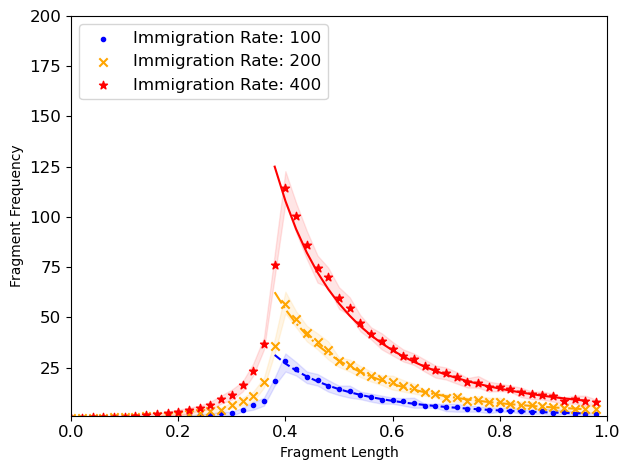

In [15]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a=1
b=1
ex_max=1
x_max=1
xlim_max=1
alpha_f = 1.0
alpha_e = -2
B_ex=0.4*x_max
ex_slope = 2
frag_speed = 1
N_split = 2
Nimm = 1
KS_threshold = 0.05
Time_scale = 0.1
N_Group = 50
Step_Max = 500
counter = 0
N_config = 3
N_sim = 50
Simulation_Data = []
Graph_Data = []
x_axis = np.linspace(0,x_max,N_Group+1)[:-1]
ex_id = int(B_ex)
tail_x = np.linspace(0,x_max,N_Group+1)[ex_id:-1]
color_list = ['b','orange','r']
marker_list = ['.','x','*']
imm_list = [100,200,400]
linestyle_list = ['dashed','dashdot','solid']
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      imm_rate = imm_list[counter]
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]
      counter += 1
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex = False, alpha_e = alpha_e, B_ex = B_ex, weighted=True, x_max=x_max,xlim_max=xlim_max, peak=True)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)
      plt.scatter(x_axis, np.diff(station_mean), marker = marker, label=f'Immigration Rate: {imm_rate}', color= color)
      #plt.plot(x_axis,up_bound, linestyle='-.', alpha=0.25, color = color)
      #plt.plot(x_axis,low_bound, linestyle='-.', alpha=0.25, color = color)
      plt.fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = color)
      plt.plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**-3/N_Group, linestyle=linestyle, color=color)
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/Vary_imm.csv')
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, a,b,alpha_f, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, mode, beta, gamma , sample_mean_age])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))
      #alpha_f = alpha_f - 0.5
      #ex_slope = ex_slope * 1.2
      #imm_rate = imm_rate + 10
      #frag_speed = frag_speed * 2
      #Time_scale = Time_scale / 2 
#plt.legend()
plt.xlim([0.4,1])
plt.ylim([1,200])
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize='large')

plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_clean_log.png')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_clean_log.pdf', format="pdf",bbox_inches='tight')

plt.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
plt.xscale('linear')
plt.yscale('linear')
plt.ylabel('Fragment Frequency')
plt.xlabel('Fragment Length')
plt.xlim([0,1])
plt.tick_params(labelsize='large')

plt.tight_layout()
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_clean.png')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_clean.pdf', format="pdf",bbox_inches='tight')

#plt.title(f' Varying Immigration Rate \n Alpha: {alpha_f: .2f}, r $\sim$ Beta({a},{b}),\n E(x) = x^{alpha_e}-{B_ex:.2f}^{alpha_e}, Frag_Speed = {frag_speed :.2f}, \n $\kappa$ = {KS_threshold: .2f}, Number of sample = {N_sim}')
#plt.tight_layout()
#plt.savefig('../Simulation Output/Numerical experiments/Vary_imm.png',bbox_inches='tight')



### Varying Fragmentation Power

Alpha:  1.00
Number of Immigrants = 1, Time_Scale = 0.1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  2.26e+00, Oldest Fragment immigrated at  4.38e-02
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  5.96e+00, Oldest Fragment immigrated at  3.90e+00
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  5.14e+00, Oldest Fragment immigrated at  1.84e+00
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  3.54e+00, Oldest Fragment immigrated at  2.37e-01
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  6.76e+00, Oldest Fragment immigrated at  3.88e+00
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  3.34e+00, Oldest Fragment immigrated at  3.44e-01
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  3.83e+00, Oldest Fragment immigrated at  1.12e+00
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  4.35e+00, Oldest Fragment immigrated at  3.69e-01
Experime

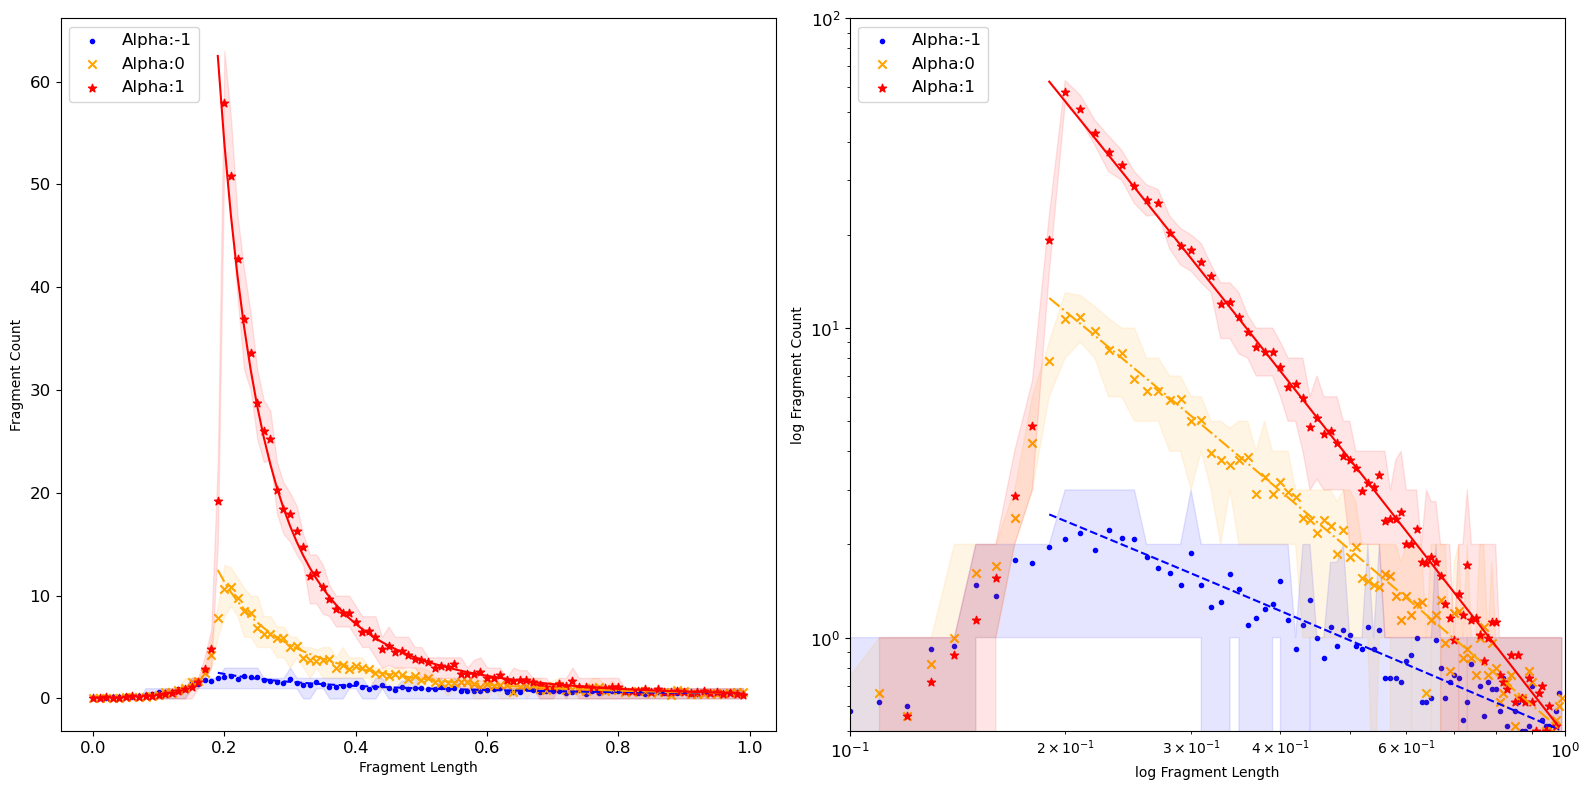

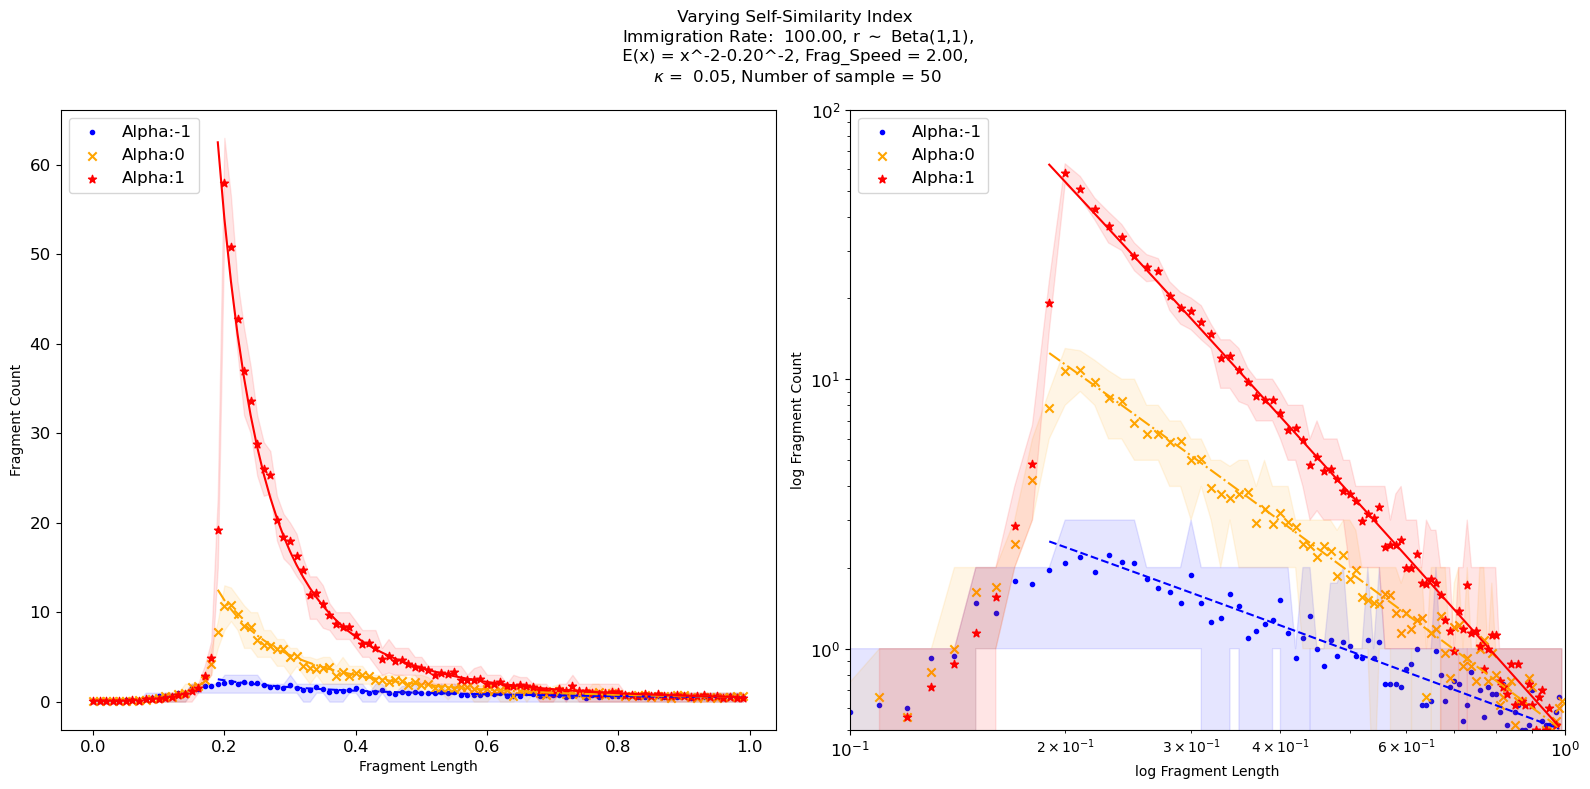

In [19]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a=1
b=1
ex_max=1
alpha_f = 1.0
alpha_e = -2
B_ex=0.2
ex_slope = 2
frag_speed = 2
N_split = 2
Nimm = 1
imm_rate = 100
KS_threshold = 0.05
Time_scale = 0.1
N_Group = 100
Step_Max = 500
counter = 0
N_config = 3
N_sim = 50
Simulation_Data = []
Graph_Data = []
fig, ax = plt.subplots(1,2, figsize=(16,8))
x_axis = np.linspace(0,1,N_Group+1)[:-1]
x_list = x_axis.tolist()
ex_id =  x_list.index(B_ex)
tail_x = np.linspace(0,1,N_Group+1)[ex_id:-1]
beta=0
c=0
color_list = ['b','orange','r']
marker_list = ['.','x','*']
linestyle_list = ['dashed','dashdot','solid']
alpha_list = [-1,0,1]
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      print(f'Alpha: {alpha_f: .2f}')
      alpha_f = alpha_list[counter]
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]      
      counter += 1
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex = False, alpha_e = alpha_e, B_ex = B_ex, weighted=True)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      #print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      #log_den, log_x_axis, beta, c = tail_loglog_fit(np.diff(station_mean),1,B_ex)
      #Best_fit = imm_rate/frag_speed*(tail_x**(-alpha_f-2)-tail_x**(-alpha_f)+1)
      #Best_fit = N_Group*np.exp(c)*tail_x**beta
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)      
      ax[0].scatter(x_axis, np.diff(station_mean), marker=marker, color=color, label=f'Alpha:{alpha_f}')
      #ax[0].plot(tail_x, Best_fit, label = f'Alpha={alpha_f}, Best Fit: {imm_rate:.1f}/{frag_speed: .1f}*x^{-alpha_f-2 : .2f}')
      #ax[0].plot(tail_x, Best_fit, label = f'Alpha={alpha_f: .2f}, Best Fit: {N_Group*np.exp(c): .2f} * x^{beta : .2f}')
      ax[1].scatter(x_axis, np.diff(station_mean), marker=marker, color=color, label=f'Alpha:{alpha_f}')
      #ax[1].plot(np.log(tail_x), np.log(Best_fit), label = f'Alpha={alpha_f: .2f}, Best Fit :log ({imm_rate:.1f}/{frag_speed: .1f}*( x^{-alpha_f-2 : .2f}-x^{-alpha_f : .2f}+1))')
      #ax[1].plot(tail_x, Best_fit, label = f'Alpha={alpha_f}, Best Fit: {imm_rate:.1f}/{frag_speed: .1f}*x^{-alpha_f-2 : .2f}')
      #ax[0].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = color)
      #ax[0].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = color)
      ax[0].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = color)      
      #ax[1].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = color)
      #ax[1].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = color)
      ax[1].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = color)            
#      ax[0].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**(-2-alpha_f)/N_Group, label=f'Alpha: {alpha_f}, Best Fit: {imm_rate/frag_speed/N_Group} x^{-2-alpha_f}')
#      ax[1].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**(-2-alpha_f)/N_Group, label=f'Alpha: {alpha_f}, Best Fit: {imm_rate/frag_speed/N_Group} x^{-2-alpha_f}')
      ax[0].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**(-2-alpha_f)/N_Group, linestyle=linestyle, color=color)
      ax[1].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**(-2-alpha_f)/N_Group, linestyle=linestyle, color=color)
      ax[0].set_ylabel('Fragment Count')
      ax[0].set_xlabel('Fragment Length')
      ax[1].set_ylabel('log Fragment Count')
      ax[1].set_xlabel('log Fragment Length')
      ax[1].set_xscale('log')
      ax[1].set_yscale('log')
      #ax[0].set_title('Fragment Profile')
      #ax[1].set_title('Fragment Profile (log-log plot)')
      ax[0].legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
      ax[1].legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
      ax[1].set_xlim([0.1,1])
      ax[1].set_ylim([0.5,100])
      ax[0].xaxis.set_tick_params(labelsize='large')
      ax[1].xaxis.set_tick_params(labelsize='large')
      ax[0].yaxis.set_tick_params(labelsize='large')
      ax[1].yaxis.set_tick_params(labelsize='large')
      #ax[1].set_ylim([4, 10])
      fig.tight_layout()
      #display(fig)
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/frag_alpha_pos.csv')
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, a,b,alpha_f, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, mode, beta, gamma , sample_mean_age])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))
      #alpha_f = alpha_f - 1
      #imm_rate = imm_rate *0.9
      #ex_slope = ex_slope * 1.2
      #imm_rate = imm_rate + 10
      #frag_speed = frag_speed * 2
      #Time_scale = Time_scale / 2 

display(fig)
fig.savefig('../Simulation Output/Numerical experiments/Clean Output/inhom_alpha_pos_clean.png')
fig.savefig('../Simulation Output/Numerical experiments/Clean Output/inhom_alpha_pos_clean.pdf', format="pdf",bbox_inches='tight')

fig.suptitle(f' Varying Self-Similarity Index \n Immigration Rate: {imm_rate: .2f}, r $\sim$ Beta({a},{b}),\n E(x) = x^{alpha_e}-{B_ex:.2f}^{alpha_e}, Frag_Speed = {frag_speed :.2f}, \n $\kappa$ = {KS_threshold: .2f}, Number of sample = {N_sim}')
fig.tight_layout()
fig.savefig('../Simulation Output/Numerical experiments/inhom_alpha_pos.png',bbox_inches='tight')
fig.savefig('../Simulation Output/Numerical experiments/inhom_alpha_pos.pdf', format="pdf",bbox_inches='tight')


### Varying Fragmentation Ratio

Here we investigate how the fragmentation ratio with Beta distribution $Beta(a,b)$ affects the shape of the equilibrium. 



#### Varying Exonuclease

We first consider exonuclease property, i.e. Beta(a,1) where a is large. In this case fragments tend to break near the edges.

r ~ Beta(1,1)
Number of Immigrants = 1, Time_Scale = 1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  4.75e+01, Oldest Fragment immigrated at  1.06e+01
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  3.33e+01, Oldest Fragment immigrated at  5.09e+00
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  4.14e+01, Oldest Fragment immigrated at  8.15e+00
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  3.32e+01, Oldest Fragment immigrated at  1.20e+00
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  3.53e+01, Oldest Fragment immigrated at  3.46e+00
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  3.63e+01, Oldest Fragment immigrated at  5.92e+00
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  3.33e+01, Oldest Fragment immigrated at  1.18e+00
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  3.72e+01, Oldest Fragment immigrated at  7.06e+00
Experimen

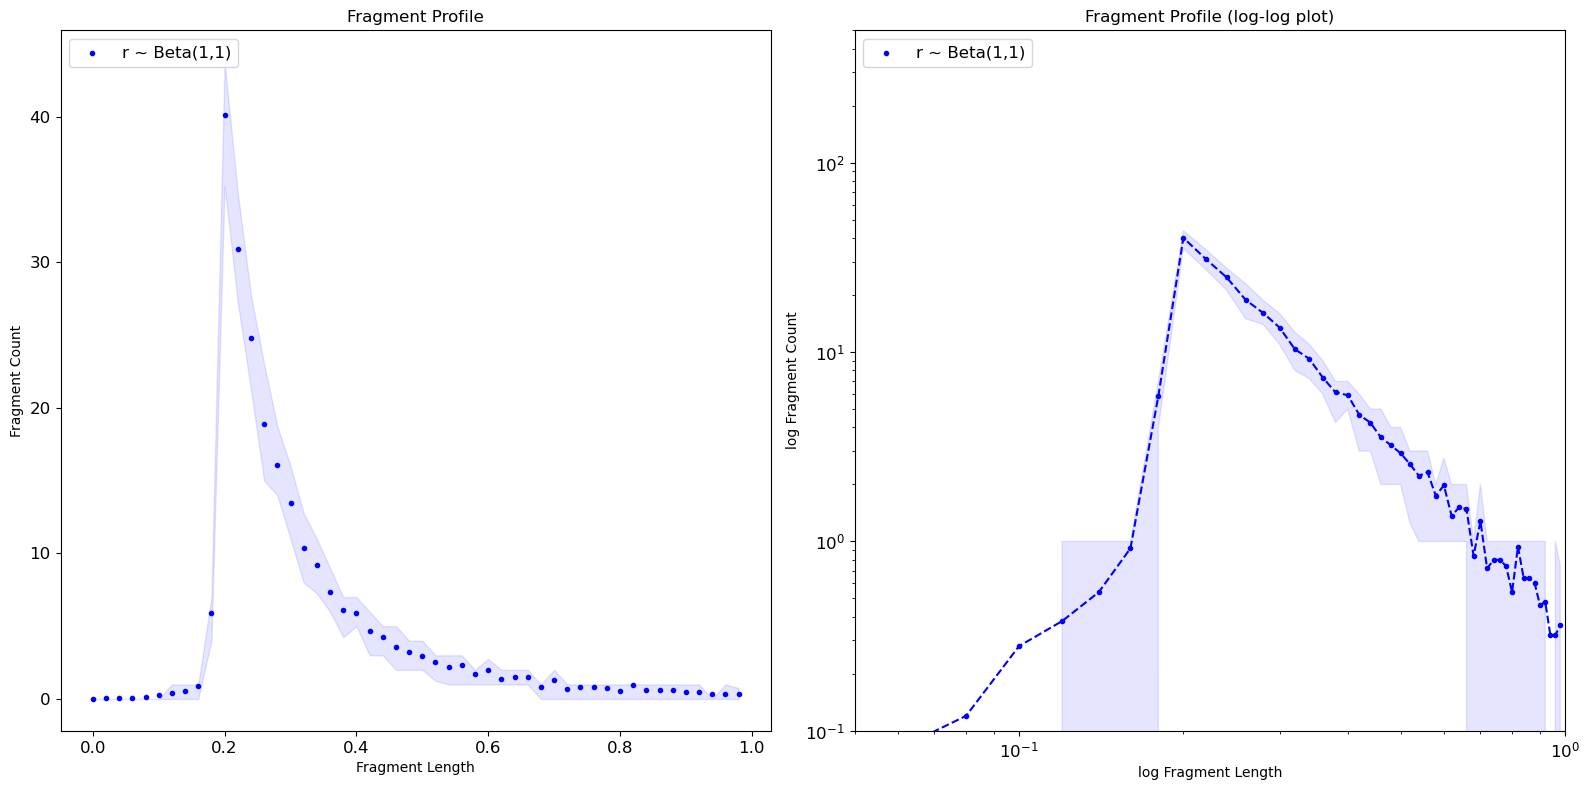

r ~ Beta(20,1)
Number of Immigrants = 1, Time_Scale = 1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  1.89e+02, Oldest Fragment immigrated at  5.83e+01
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  2.10e+02, Oldest Fragment immigrated at  6.54e+01
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  2.66e+02, Oldest Fragment immigrated at  1.14e+02
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  2.27e+02, Oldest Fragment immigrated at  4.77e+01
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  1.86e+02, Oldest Fragment immigrated at  1.21e+01
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  3.04e+02, Oldest Fragment immigrated at  1.69e+02
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  1.95e+02, Oldest Fragment immigrated at  6.61e+01
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  2.30e+02, Oldest Fragment immigrated at  8.22e+01
Experime

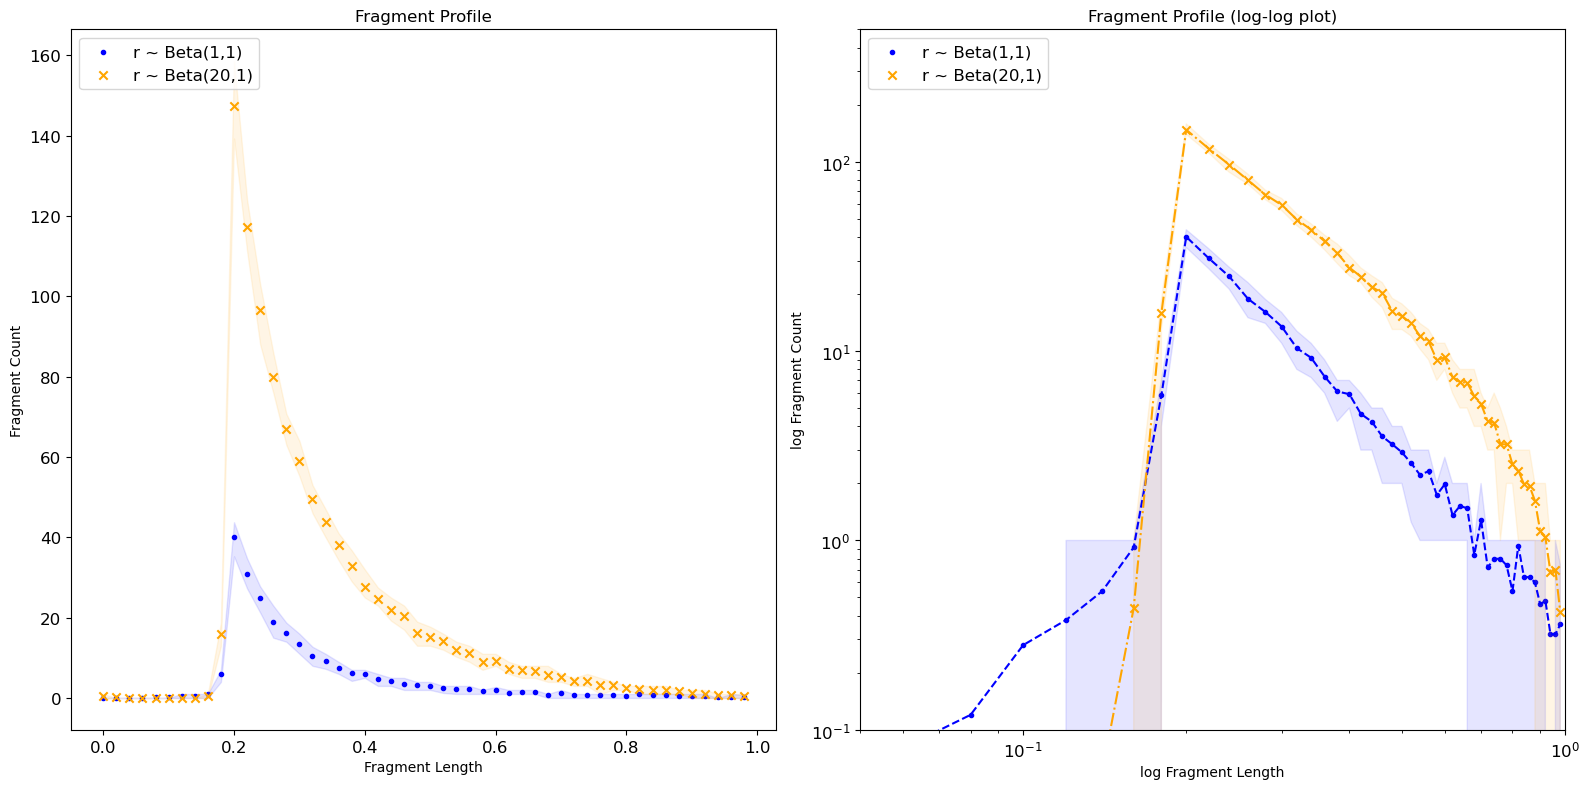

r ~ Beta(50,1)
Number of Immigrants = 1, Time_Scale = 1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  5.91e+02, Oldest Fragment immigrated at  2.89e+02
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  5.35e+02, Oldest Fragment immigrated at  2.45e+02
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  5.42e+02, Oldest Fragment immigrated at  2.55e+02
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  4.71e+02, Oldest Fragment immigrated at  1.75e+02
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  4.54e+02, Oldest Fragment immigrated at  1.62e+02
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  5.62e+02, Oldest Fragment immigrated at  3.01e+02
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  4.19e+02, Oldest Fragment immigrated at  1.26e+02
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  4.40e+02, Oldest Fragment immigrated at  1.38e+02
Experime

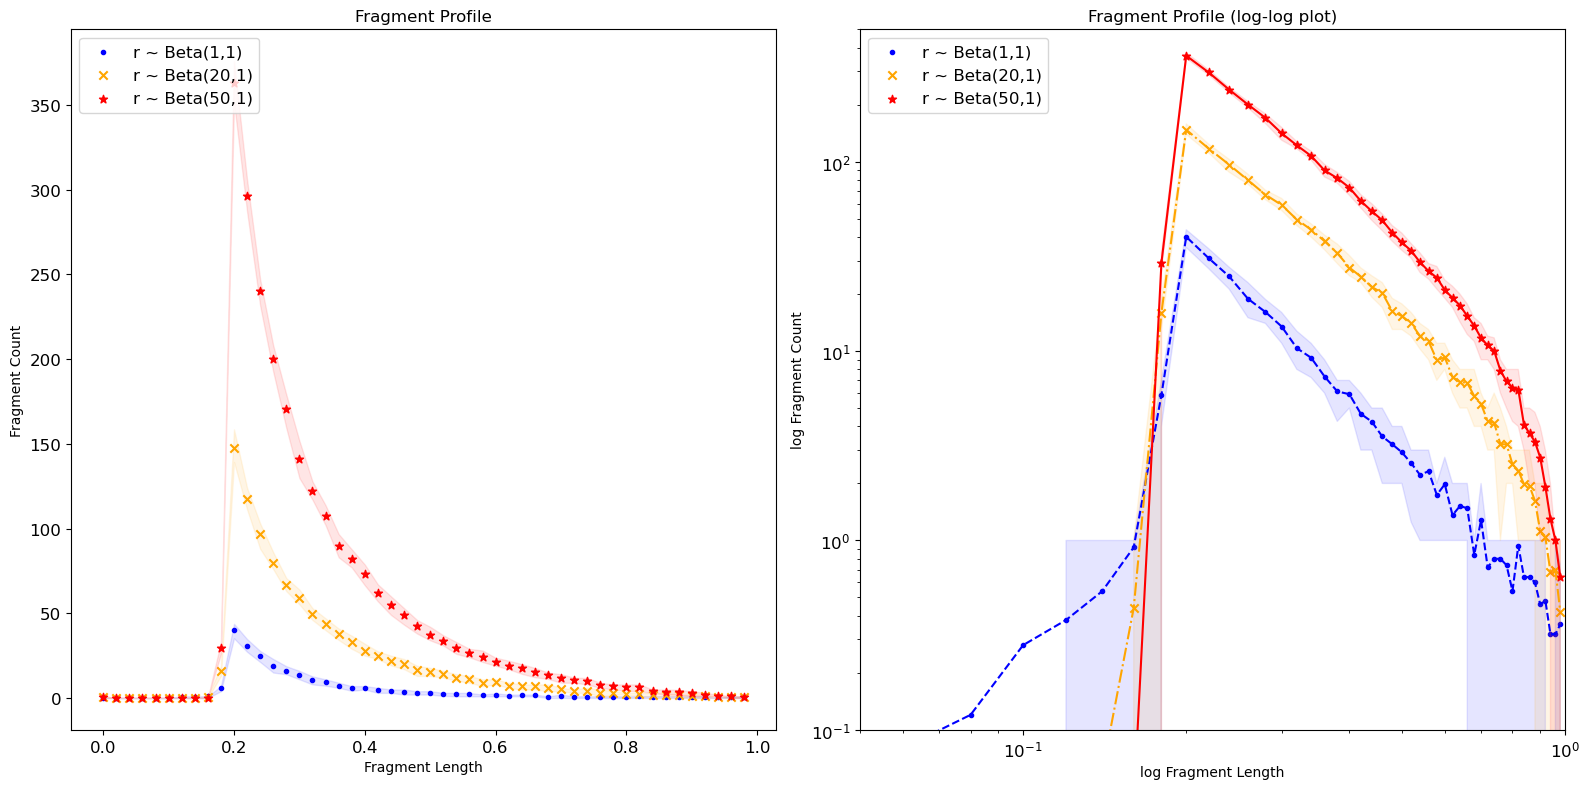

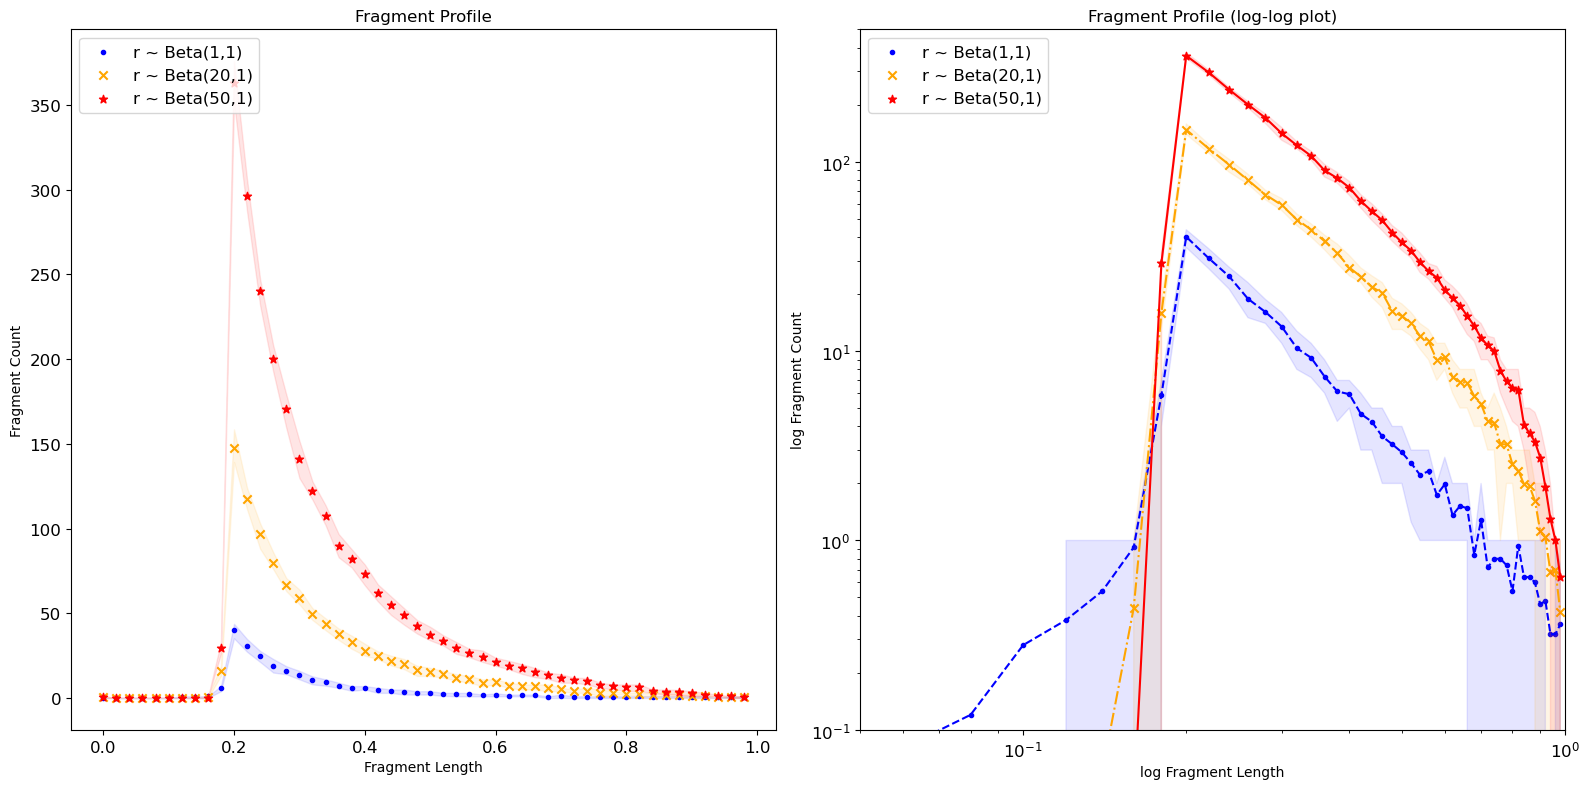

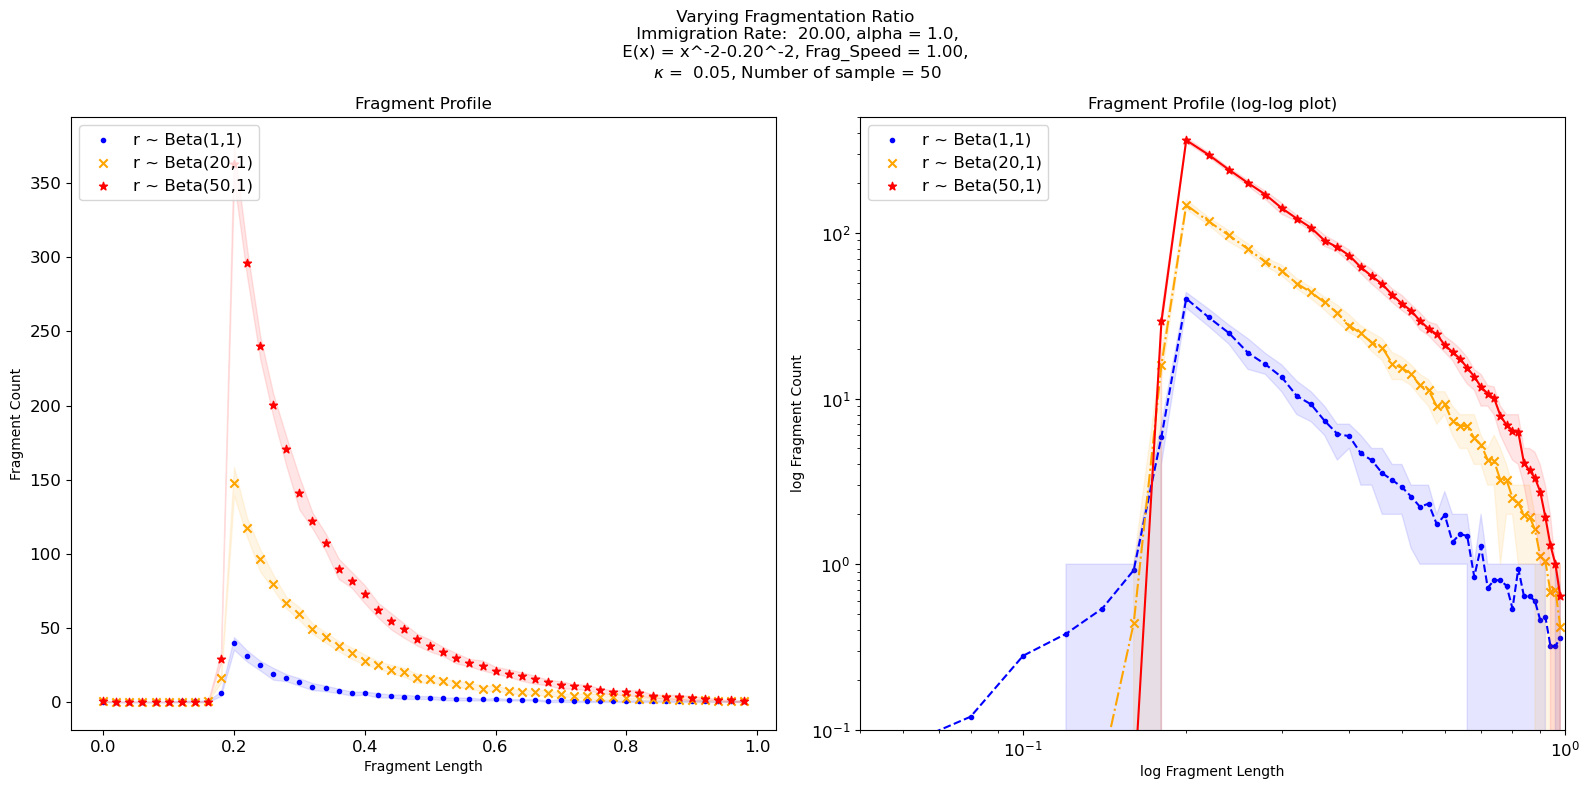

In [9]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a=1
b=10
ex_max=1
alpha_f = 1.0
alpha_e = -2
B_ex=0.2
ex_slope = 2
frag_speed = 1
N_split = 2
Nimm = 1
imm_rate = 20
KS_threshold = 0.05
Time_scale = 1
N_Group = 50
Step_Max = 1000
counter = 0
N_config = 3
N_sim = 50
Simulation_Data = []
Graph_Data = []
fig, ax = plt.subplots(1,2, figsize=(16,8))
x_axis = np.linspace(0,1,N_Group+1)[:-1]
x_list = x_axis.tolist()
ex_id =  x_list.index(B_ex)
tail_x = np.linspace(0,1,N_Group+1)[ex_id:-1]
beta=0
c=0
a_list=[1,20, 50]
color_list = ['b','orange','r']
marker_list = ['.','x','*']
linestyle_list = ['dashed','dashdot','solid']
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      a=a_list[counter]
      b=1
      print(f'r ~ Beta({a},{b})')
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]      
      counter += 1
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex = False, alpha_e = alpha_e, B_ex = B_ex, weighted=True)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      #print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      #log_den, log_x_axis, beta, c = tail_loglog_fit(np.diff(station_mean),1,B_ex)
      #Best_fit = imm_rate/frag_speed*(tail_x**(-alpha_f-2)-tail_x**(-alpha_f)+1)
      #Best_fit = N_Group*np.exp(c)*tail_x**beta
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)      
      ax[0].scatter(x_axis, np.diff(station_mean), marker=marker, color=color, label=f'r ~ Beta({a},{b})')
      #ax[0].plot(tail_x, Best_fit, label = f'Alpha={alpha_f}, Best Fit: {imm_rate:.1f}/{frag_speed: .1f}*x^{-alpha_f-2 : .2f}')
      #ax[0].plot(tail_x, Best_fit, label = f'Alpha={alpha_f: .2f}, Best Fit: {N_Group*np.exp(c): .2f} * x^{beta : .2f}')
      ax[1].scatter(x_axis, np.diff(station_mean), marker=marker,color=color, label=f'r ~ Beta({a},{b})')
      ax[1].plot(x_axis, np.diff(station_mean), color=color, linestyle=linestyle)
      #ax[1].plot(np.log(tail_x), np.log(Best_fit), label = f'Alpha={alpha_f: .2f}, Best Fit :log ({imm_rate:.1f}/{frag_speed: .1f}*( x^{-alpha_f-2 : .2f}-x^{-alpha_f : .2f}+1))')
      #ax[1].plot(tail_x, Best_fit, label = f'Alpha={alpha_f}, Best Fit: {imm_rate:.1f}/{frag_speed: .1f}*x^{-alpha_f-2 : .2f}')
      #ax[0].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = color)
      #ax[0].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = color)
      ax[0].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = color)      
      #ax[1].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = color)
      #ax[1].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = color)
      ax[1].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = color)            
      #ax[0].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**(-2-alpha_f)/N_Group, label=f'Alpha: {alpha_f}, Best Fit: {imm_rate/frag_speed/N_Group} x^{-2-alpha_f}')
      #ax[1].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**(-2-alpha_f)/N_Group, label=f'Alpha: {alpha_f}, Best Fit: {imm_rate/frag_speed/N_Group} x^{-2-alpha_f}')
      ax[0].set_ylabel('Fragment Count')
      ax[0].set_xlabel('Fragment Length')
      ax[1].set_ylabel('log Fragment Count')
      ax[1].set_xlabel('log Fragment Length')
      ax[1].set_xscale('log')
      ax[1].set_yscale('log')
      ax[0].set_title('Fragment Profile')
      ax[1].set_title('Fragment Profile (log-log plot)')
      ax[0].legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
      ax[1].legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
      ax[1].set_xlim([0.05,1])
      ax[1].set_ylim([0.1,500])
      ax[0].xaxis.set_tick_params(labelsize='large')
      ax[1].xaxis.set_tick_params(labelsize='large')
      ax[0].yaxis.set_tick_params(labelsize='large')
      ax[1].yaxis.set_tick_params(labelsize='large')
      #ax[1].set_xlim([np.log(B_ex), 0])
      #ax[1].set_ylim([4, 10])
      fig.tight_layout()
      display(fig)
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/frag_beta_exonuclease.csv')
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, a,b,alpha_f, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, mode, beta, gamma , sample_mean_age])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))
      #alpha_f = alpha_f - 1
      #imm_rate = imm_rate *0.9
      #ex_slope = ex_slope * 1.2
      #imm_rate = imm_rate + 10
      #frag_speed = frag_speed * 2
      #Time_scale = Time_scale / 2 
display(fig)
fig.savefig('../Simulation Output/Numerical experiments/Clean Output/vary_beta_exonuclease.png')
fig.savefig('../Simulation Output/Numerical experiments/Clean Output/vary_beta_exonuclease.pdf', format="pdf",bbox_inches='tight')

fig.suptitle(f' Varying Fragmentation Ratio \n Immigration Rate: {imm_rate: .2f}, alpha = {alpha_f},\n E(x) = x^{alpha_e}-{B_ex:.2f}^{alpha_e}, Frag_Speed = {frag_speed :.2f}, \n $\kappa$ = {KS_threshold: .2f}, Number of sample = {N_sim}')
fig.tight_layout()
fig.savefig('../Simulation Output/Numerical experiments/vary_beta_exonuclease.png')
fig.savefig('../Simulation Output/Numerical experiments/vary_beta_exonuclease.pdf', format="pdf",bbox_inches='tight')


#### Supplementary Result - Varying Endonuclease

Finally we consider endonuclease property, i.e. Beta(n,n) with n large. Fragments tend to break in the middle.

r ~ Beta(1,1)
Number of Immigrants = 1, Time_Scale = 1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  3.81e+01, Oldest Fragment immigrated at  3.30e+00
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  5.10e+01, Oldest Fragment immigrated at  9.45e+00
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  3.91e+01, Oldest Fragment immigrated at  1.20e+00
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  4.91e+01, Oldest Fragment immigrated at  7.47e+00
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  4.81e+01, Oldest Fragment immigrated at  4.77e+00
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  4.21e+01, Oldest Fragment immigrated at  2.03e+00
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  5.81e+01, Oldest Fragment immigrated at  1.73e+01
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  4.81e+01, Oldest Fragment immigrated at  5.74e+00
Experimen

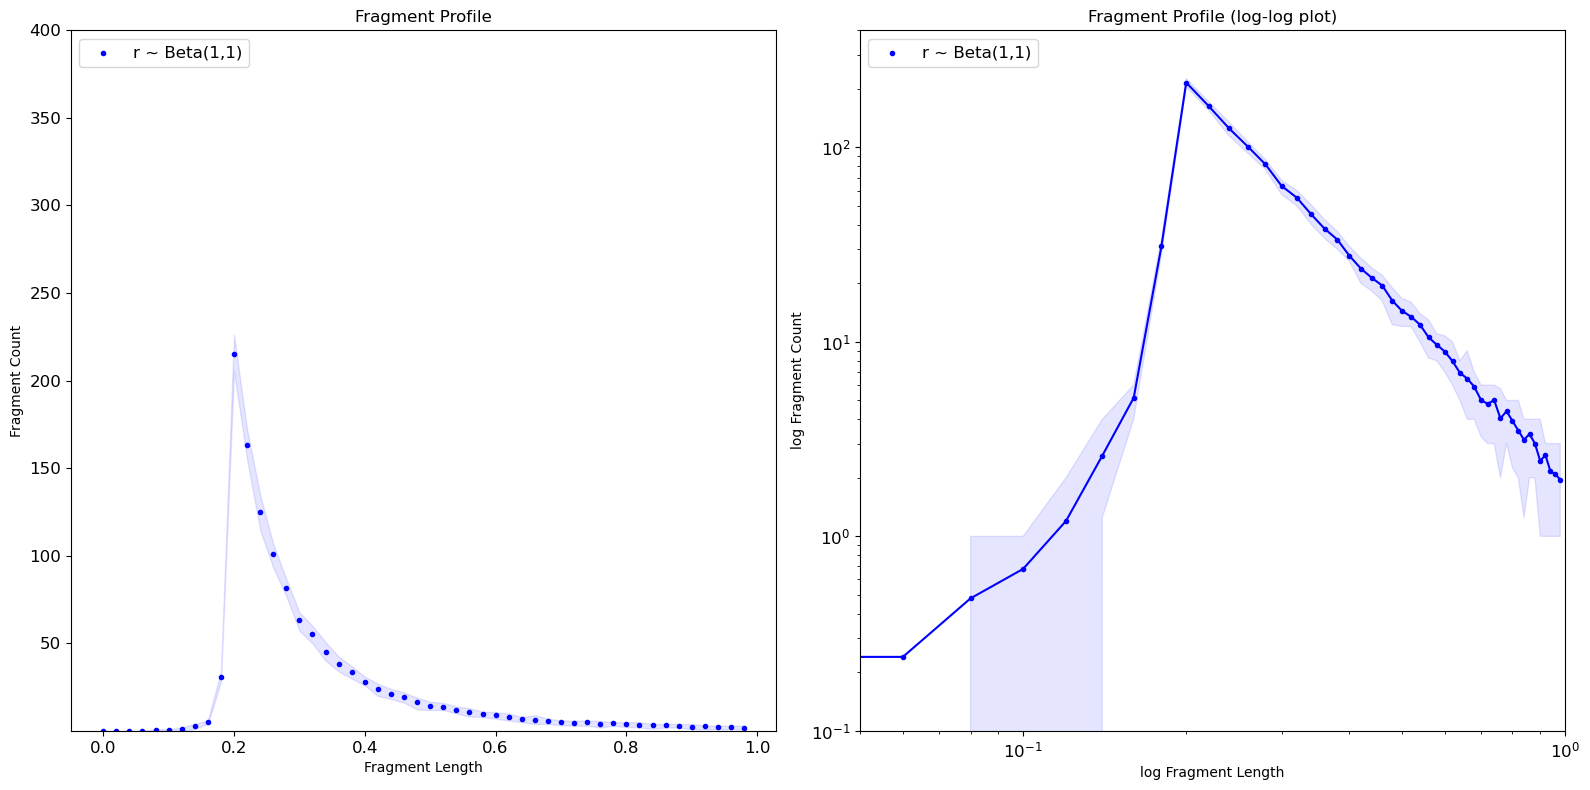

r ~ Beta(100,100)
Number of Immigrants = 1, Time_Scale = 1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  2.50e+01, Oldest Fragment immigrated at  1.19e+00
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  3.01e+01, Oldest Fragment immigrated at  5.45e-01
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  2.91e+01, Oldest Fragment immigrated at  2.11e+00
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  3.30e+01, Oldest Fragment immigrated at  3.22e+00
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  2.70e+01, Oldest Fragment immigrated at  2.06e+00
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  2.91e+01, Oldest Fragment immigrated at  5.39e-02
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  4.31e+01, Oldest Fragment immigrated at  1.13e-01
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  2.70e+01, Oldest Fragment immigrated at  8.72e-01
Exper

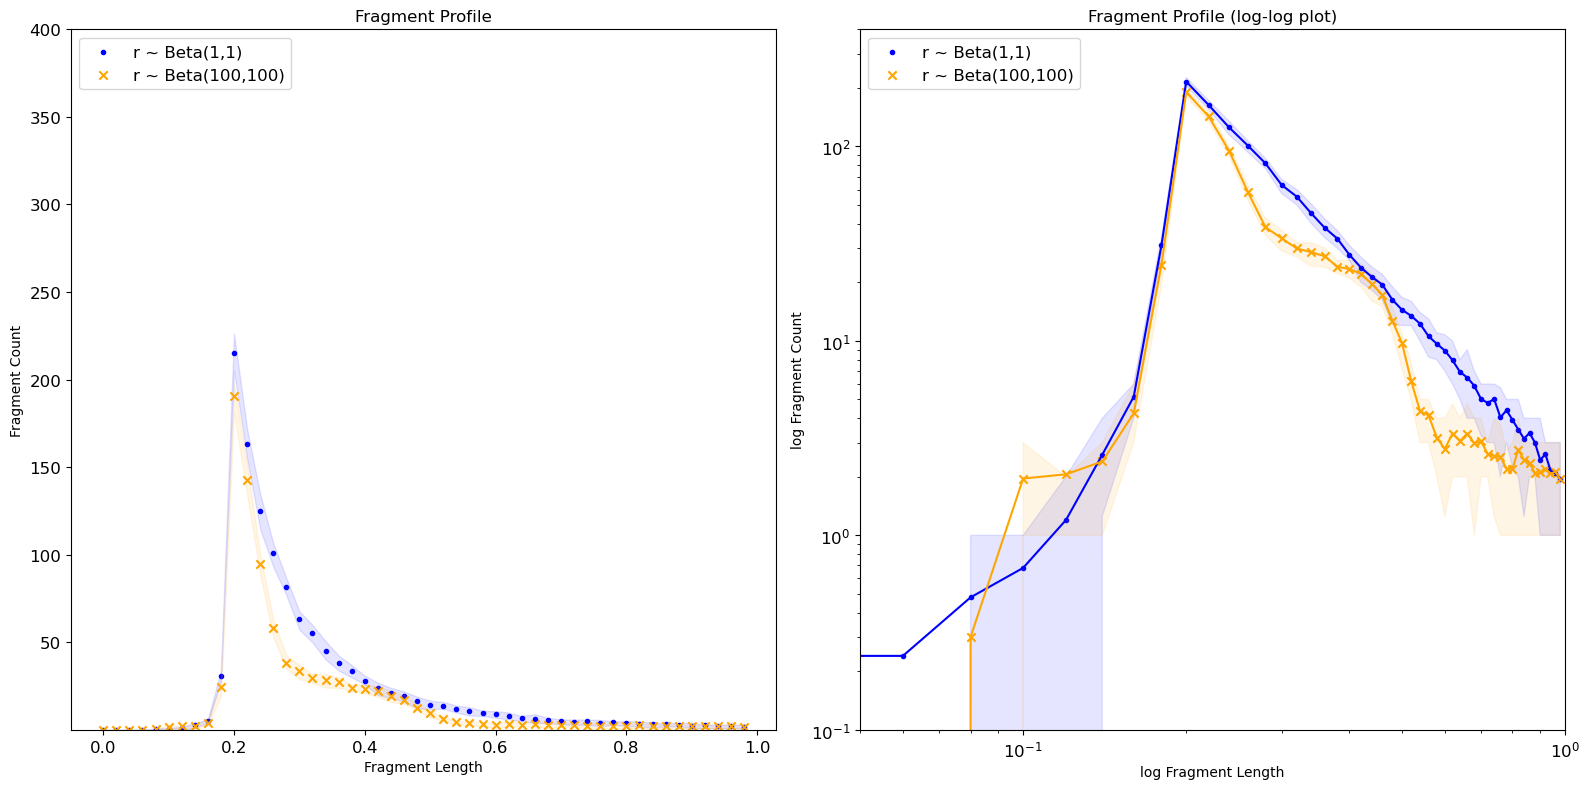

r ~ Beta(1000,1000)
Number of Immigrants = 1, Time_Scale = 1
Experiment: 1, Seed: 1
Equilibrium Reached = True, Mixing Time is  2.50e+01, Oldest Fragment immigrated at  9.28e-01
Experiment: 2, Seed: 2
Equilibrium Reached = True, Mixing Time is  4.71e+01, Oldest Fragment immigrated at  8.51e+00
Experiment: 3, Seed: 3
Equilibrium Reached = True, Mixing Time is  3.01e+01, Oldest Fragment immigrated at  7.30e-01
Experiment: 4, Seed: 4
Equilibrium Reached = True, Mixing Time is  3.00e+01, Oldest Fragment immigrated at  2.17e+00
Experiment: 5, Seed: 5
Equilibrium Reached = True, Mixing Time is  3.21e+01, Oldest Fragment immigrated at  5.31e+00
Experiment: 6, Seed: 6
Equilibrium Reached = True, Mixing Time is  2.70e+01, Oldest Fragment immigrated at  3.50e-02
Experiment: 7, Seed: 7
Equilibrium Reached = True, Mixing Time is  3.31e+01, Oldest Fragment immigrated at  3.48e+00
Experiment: 8, Seed: 8
Equilibrium Reached = True, Mixing Time is  3.11e+01, Oldest Fragment immigrated at  5.59e-01
Exp

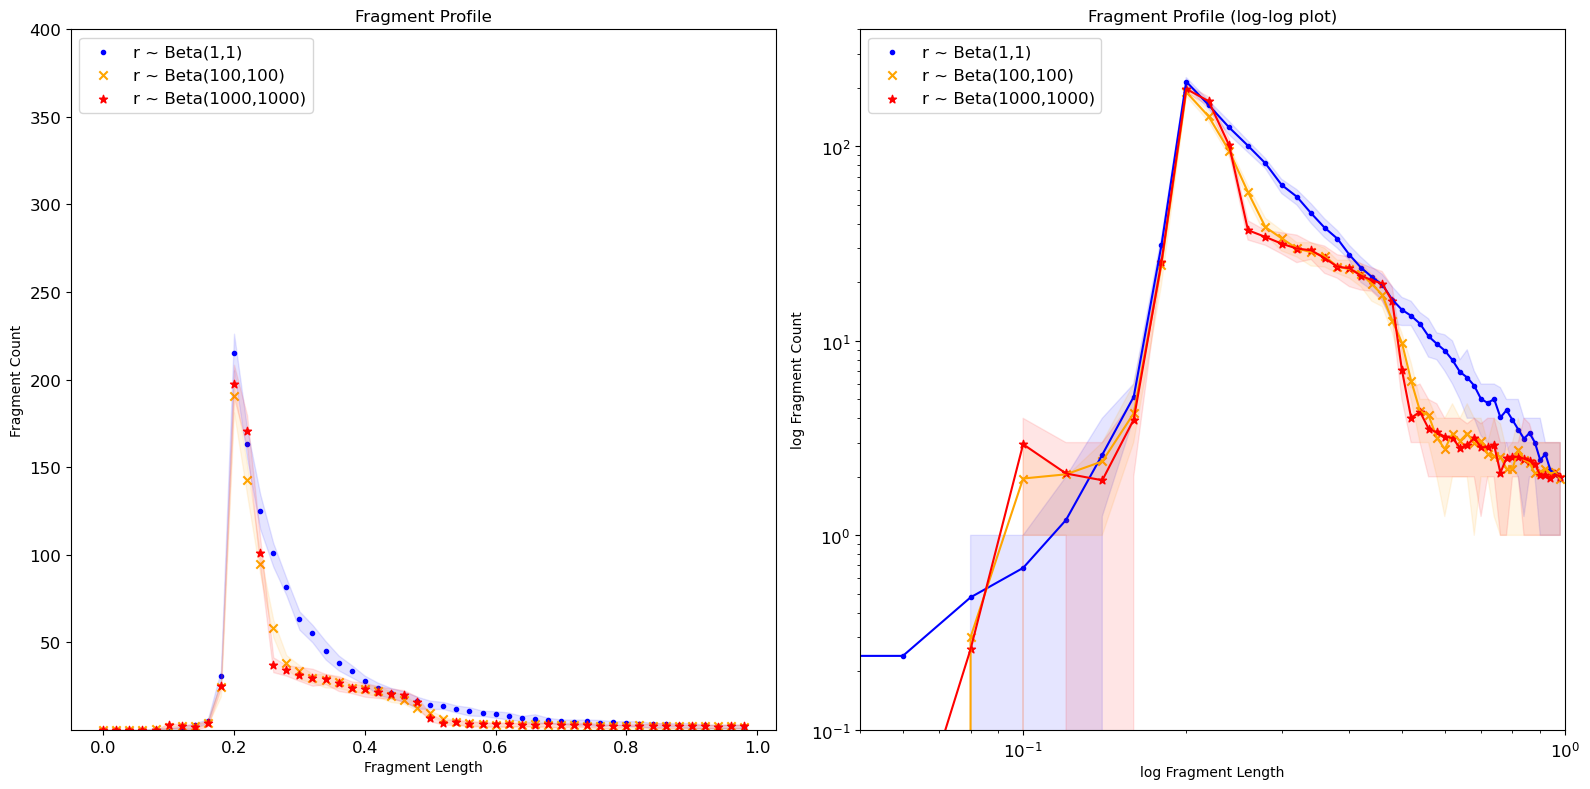

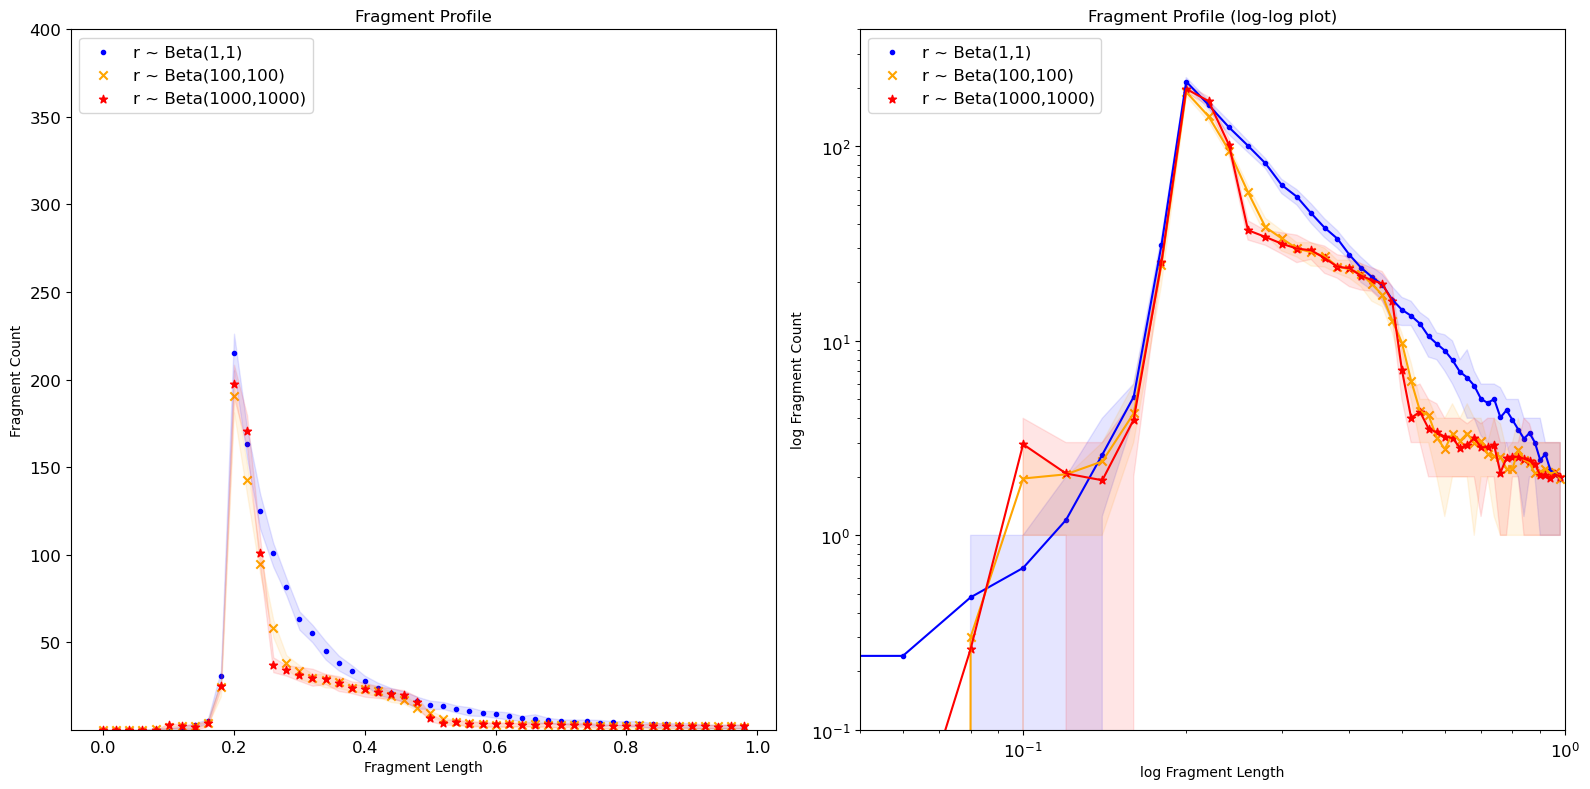

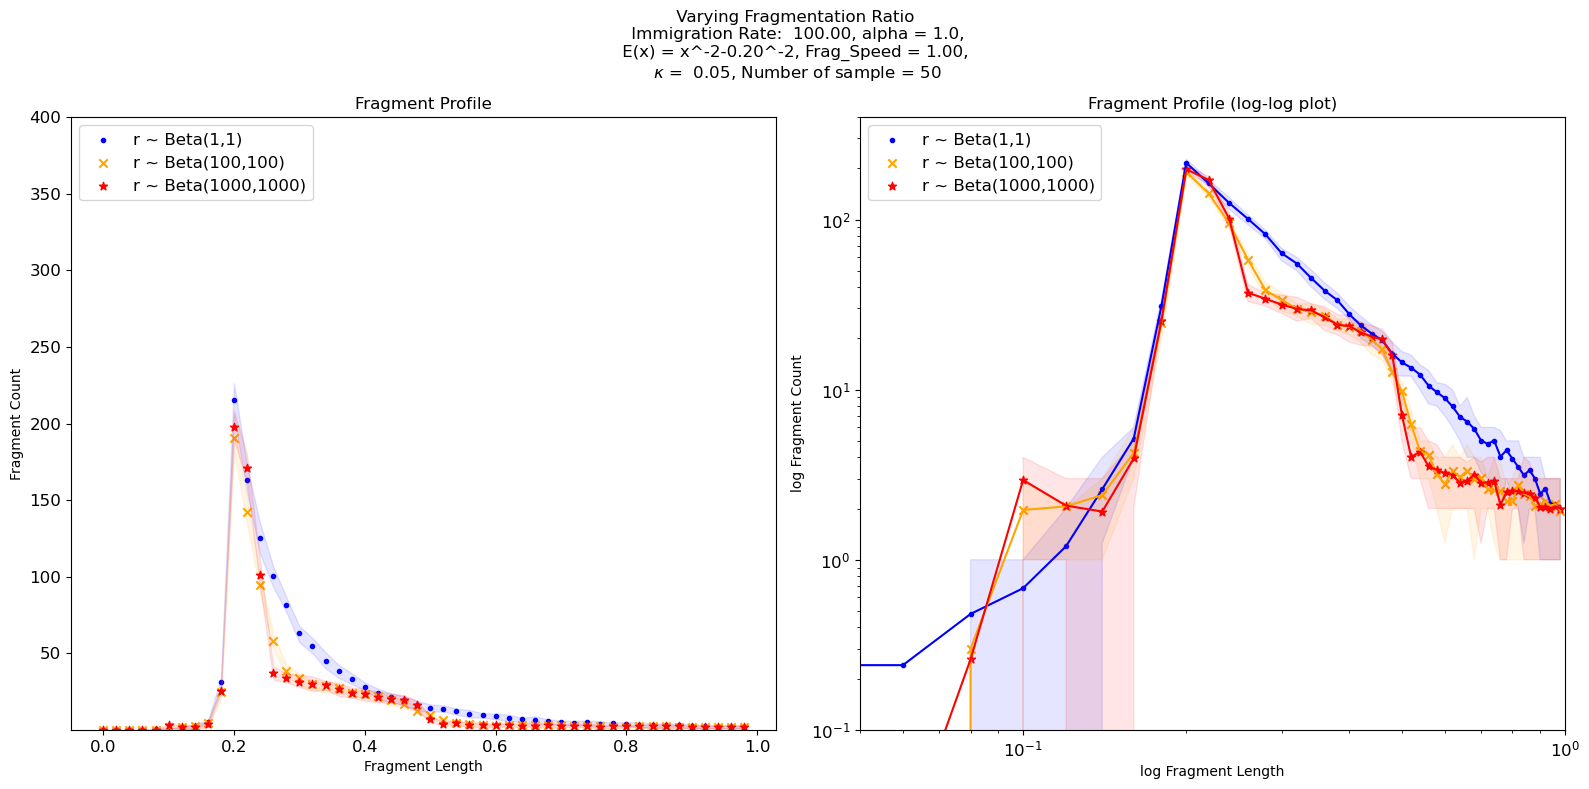

In [17]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a=1
ex_max=1
alpha_f = 1.0
alpha_e = -2
B_ex=0.2
ex_slope = 2
frag_speed = 1
N_split = 2
Nimm = 1
imm_rate = 100
KS_threshold = 0.05
Time_scale = 1
N_Group = 50
Step_Max = 1000
counter = 0
N_config = 3
N_sim = 50
Simulation_Data = []
Graph_Data = []
fig, ax = plt.subplots(1,2, figsize=(16,8))
x_axis = np.linspace(0,1,N_Group+1)[:-1]
x_list = x_axis.tolist()
ex_id =  x_list.index(B_ex)
tail_x = np.linspace(0,1,N_Group+1)[ex_id:-1]
beta=0
c=0
a_list=[1,100, 1000]
color_list = ['b','orange','r']
marker_list = ['.','x','*']
linestyle_list = ['dashed','dashdot','solid']
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      a=a_list[counter]
      b=a_list[counter]
      print(f'r ~ Beta({a},{b})')
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]      
      counter += 1
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex = False, alpha_e = alpha_e, B_ex = B_ex, weighted=True)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      #print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      #log_den, log_x_axis, beta, c = tail_loglog_fit(np.diff(station_mean),1,B_ex)
      #Best_fit = imm_rate/frag_speed*(tail_x**(-alpha_f-2)-tail_x**(-alpha_f)+1)
      #Best_fit = N_Group*np.exp(c)*tail_x**beta
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)      
      ax[0].scatter(x_axis, np.diff(station_mean), marker=marker, color=color, label=f'r ~ Beta({a},{b})')
      #ax[0].plot(tail_x, Best_fit, label = f'Alpha={alpha_f}, Best Fit: {imm_rate:.1f}/{frag_speed: .1f}*x^{-alpha_f-2 : .2f}')
      #ax[0].plot(tail_x, Best_fit, label = f'Alpha={alpha_f: .2f}, Best Fit: {N_Group*np.exp(c): .2f} * x^{beta : .2f}')
      ax[1].scatter(x_axis, np.diff(station_mean), marker=marker,color=color, label=f'r ~ Beta({a},{b})')
      ax[1].plot(x_axis, np.diff(station_mean), color=color)
      #ax[1].plot(np.log(tail_x), np.log(Best_fit), label = f'Alpha={alpha_f: .2f}, Best Fit :log ({imm_rate:.1f}/{frag_speed: .1f}*( x^{-alpha_f-2 : .2f}-x^{-alpha_f : .2f}+1))')
      #ax[1].plot(tail_x, Best_fit, label = f'Alpha={alpha_f}, Best Fit: {imm_rate:.1f}/{frag_speed: .1f}*x^{-alpha_f-2 : .2f}')
      #ax[0].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = color)
      #ax[0].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = color)
      ax[0].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = color)      
      #ax[1].plot(x_axis,up_bound, linestyle='-.', alpha=0.5, color = color)
      #ax[1].plot(x_axis,low_bound, linestyle='-.', alpha=0.5, color = color)
      ax[1].fill_between(x_axis, low_bound, up_bound, alpha=0.1, color = color)            
      #ax[0].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**(-2-alpha_f)/N_Group, label=f'Alpha: {alpha_f}, Best Fit: {imm_rate/frag_speed/N_Group} x^{-2-alpha_f}')
      #ax[1].plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**(-2-alpha_f)/N_Group, label=f'Alpha: {alpha_f}, Best Fit: {imm_rate/frag_speed/N_Group} x^{-2-alpha_f}')
      ax[0].set_ylabel('Fragment Count')
      ax[0].set_xlabel('Fragment Length')
      ax[1].set_ylabel('log Fragment Count')
      ax[1].set_xlabel('log Fragment Length')
      ax[1].set_xscale('log')
      ax[1].set_yscale('log')
      ax[0].set_title('Fragment Profile')
      ax[1].set_title('Fragment Profile (log-log plot)')
      ax[0].legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
      ax[1].legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
      ax[1].set_xlim([0.05,1])
      ax[1].set_ylim([0.1,500])
      ax[0].xaxis.set_tick_params(labelsize='large')
      ax[1].xaxis.set_tick_params(labelsize='large')
      ax[0].yaxis.set_tick_params(labelsize='large')
      ax[1].yaxis.set_tick_params(labelsize='large')
      ax[0].set_ylim([0.1,400])
      ax[1].set_ylim([0.1,400])
      #ax[1].set_xlim([np.log(B_ex), 0])
      #ax[1].set_ylim([4, 10])
      fig.tight_layout()
      display(fig)
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/frag_alpha_endonuclease.csv')
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, a,b,alpha_f, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, mode, beta, gamma , sample_mean_age])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))
      #alpha_f = alpha_f - 1
      #imm_rate = imm_rate *0.9
      #ex_slope = ex_slope * 1.2
      #imm_rate = imm_rate + 10
      #frag_speed = frag_speed * 2
      #Time_scale = Time_scale / 2 
display(fig)

fig.savefig('../Simulation Output/Numerical experiments/Clean Output/vary_beta_endonuclease.png')
fig.savefig('../Simulation Output/Numerical experiments/Clean Output/vary_beta_endonuclease.pdf', format="pdf",bbox_inches='tight')

fig.suptitle(f' Varying Fragmentation Ratio \n Immigration Rate: {imm_rate: .2f}, alpha = {alpha_f},\n E(x) = x^{alpha_e}-{B_ex:.2f}^{alpha_e}, Frag_Speed = {frag_speed :.2f}, \n $\kappa$ = {KS_threshold: .2f}, Number of sample = {N_sim}')
fig.tight_layout()
fig.savefig('../Simulation Output/Numerical experiments/vary_beta_endonuclease.png')
fig.savefig('../Simulation Output/Numerical experiments/vary_beta_endonuclease.pdf', format="pdf",bbox_inches='tight')


## Supplementary Result - Varying Immigration Distribution
Here we change the distribution of the immigrant fragment size.

##### Varying Normal Distribution

In [ ]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a=1
b=1
ex_max=1
x_max=1
xlim_max=1
alpha_f = 1.0
alpha_e = -2
B_ex=0.4*x_max
ex_slope = 2
frag_speed = 1
N_split = 2
Nimm = 1
KS_threshold = 0.05
Time_scale = 0.1
N_Group = 50
Step_Max = 500
counter = 0
N_config = 3
N_sim = 50
imm_rate = 500
Simulation_Data = []
Graph_Data = []
x_axis = np.linspace(0,x_max,N_Group+1)[:-1]
ex_id = int(B_ex)
tail_x = np.linspace(0,x_max,N_Group+1)[ex_id:-1]
color_list = ['b','orange','r']
marker_list = ['.','x','*']
mu_list = [0.5,0.7,0.9]
linestyle_list = ['dashed','dashdot','solid']
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      mu_i = mu_list[counter]
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]
      counter += 1
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex = False, alpha_e = alpha_e, B_ex = B_ex, weighted=True, x_max=x_max,xlim_max=xlim_max, peak=True, norm_imm=True, mu_i = mu_i)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)
      plt.scatter(x_axis, np.diff(station_mean), marker = marker, label=f'Immigrant Distribution: N(({mu_i},{0.1*mu_i: .2f})', color= color)
      #plt.plot(x_axis,up_bound, linestyle='-.', alpha=0.25, color = color)
      #plt.plot(x_axis,low_bound, linestyle='-.', alpha=0.25, color = color)
      plt.fill_between(x_axis, low_bound, up_bound, alpha=0.1, color=color)
      #plt.plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**-3/N_Group, linestyle=linestyle)
      plt.ylabel('Fragment Frequency')
      plt.xlabel('Fragment Length')
      plt.tight_layout()
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/Vary_imm_exp.csv')
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, a,b,alpha_f, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, mode, beta, gamma , sample_mean_age])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))
      #alpha_f = alpha_f - 0.5
      #ex_slope = ex_slope * 1.2
      #imm_rate = imm_rate + 10
      #frag_speed = frag_speed * 2
      #Time_scale = Time_scale / 2 
plt.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
plt.tick_params(labelsize='large')
plt.ylim([0.1,400])
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_norm_clean.png')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_norm_clean.pdf', format="pdf",bbox_inches='tight')

plt.xscale('log')
plt.yscale('log')
plt.xlim([0.4,1])
plt.ylim([0.1,5000])
plt.tick_params(labelsize='large')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_norm_clean_log.png')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_norm_clean_log.pdf', format="pdf",bbox_inches='tight')

#plt.title(f' Varying Immigration Rate \n Alpha: {alpha_f: .2f}, r $\sim$ Beta({a},{b}),\n E(x) = x^{alpha_e}-{B_ex:.2f}^{alpha_e}, Frag_Speed = {frag_speed :.2f}, \n $\kappa$ = {KS_threshold: .2f}, Number of sample = {N_sim}')
#plt.tight_layout()
#plt.savefig('../Simulation Output/Numerical experiments/Vary_imm.png',bbox_inches='tight')



##### Varying Exponential Distribution

In [ ]:
import pandas as pd
from Frag_Ex_Imm_Func import *
a=1
b=1
ex_max=1
x_max=1
xlim_max=1
alpha_f = 1.0
alpha_e = -2
B_ex=0.4*x_max
ex_slope = 2
frag_speed = 1
N_split = 2
Nimm = 1
KS_threshold = 0.05
Time_scale = 0.1
N_Group = 50
Step_Max = 500
counter = 0
N_config = 3
N_sim = 50
imm_rate = 500
Simulation_Data = []
Graph_Data = []
x_axis = np.linspace(0,x_max,N_Group+1)[:-1]
ex_id = int(B_ex)
tail_x = np.linspace(0,x_max,N_Group+1)[ex_id:-1]
color_list = ['b','orange','r']
marker_list = ['.','x','*']
mu_list = [0.1,0.5,0.7]
linestyle_list = ['dashed','dashdot','solid']
#y = Simulation(ex_max, ex_slope, frag_speed, N_split, Nimm, imm_rate, Time_scale, N_Group, ratio, KS_threshold, Step_Max)
################### Here we explore different configurations, add them into Simulation_Data ################################
while counter < N_config:
      mu_i = mu_list[counter]
      color = color_list[counter]
      marker= marker_list[counter]
      linestyle=linestyle_list[counter]
      counter += 1
      y = Simulation(ex_max, ex_slope, frag_speed, N_split, a,b, alpha_f, Nimm, imm_rate, Time_scale, N_Group, KS_threshold, Step_Max, lin_ex = False, alpha_e = alpha_e, B_ex = B_ex, weighted=True, x_max=x_max,xlim_max=xlim_max, peak=True, exp_imm=True, mu_i = mu_i)
      sim_mat, station_mean, Equilibrium_list, Mix_time_list, sample_mean_age, mode, beta, gamma = y.run_simulation(N_sim)
      print(f"Success rate: {np.sum(Equilibrium_list)/len(Equilibrium_list)*100: .1f}%")
      print(f"Mixing Times: {Mix_time_list}, Average: {np.mean(Mix_time_list): .1f}")
      up_bound = np.percentile(sim_mat, 75, axis=0)
      low_bound = np.percentile(sim_mat, 25, axis=0)
      plt.scatter(x_axis, np.diff(station_mean), marker = marker, label=f'Immigrant Distribution: Exp({mu_i})', color= color)
      #plt.plot(x_axis,up_bound, linestyle='-.', alpha=0.25, color = color)
      #plt.plot(x_axis,low_bound, linestyle='-.', alpha=0.25, color = color)
      plt.fill_between(x_axis, low_bound, up_bound, alpha=0.1, color=color)
      #plt.plot(x_axis[19:-1], imm_rate/frag_speed*x_axis[20:]**-3/N_Group, linestyle=linestyle)
      plt.ylabel('Fragment Frequency')
      plt.xlabel('Fragment Length')
      plt.tight_layout()
      Graph_Data.append(np.diff(station_mean)*N_Group)
      pd.DataFrame(Graph_Data).to_csv('../Simulation Output/Numerical experiments/Vary_imm_exp.csv')
      Simulation_Data.append([ex_max, B_ex, frag_speed, Nimm, imm_rate, a,b,alpha_f, np.mean(Mix_time_list),np.sum(Equilibrium_list)/len(Equilibrium_list)*100, mode, beta, gamma , sample_mean_age])
      #ex_max =  abs(ex_max + np.random.uniform(-3,3))
      #ex_slope = B_ex*ex_max
      #ex_slope = abs(ex_slope + np.random.uniform(-10,10))
      #alpha_f = alpha_f - 0.5
      #ex_slope = ex_slope * 1.2
      #imm_rate = imm_rate + 10
      #frag_speed = frag_speed * 2
      #Time_scale = Time_scale / 2 
plt.legend(loc='upper left', bbox_to_anchor=(0,1), fontsize='large')
plt.tick_params(labelsize='large')
plt.ylim([0.1,400])
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_exp_clean.png')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_exp_clean.pdf', format="pdf",bbox_inches='tight')

plt.xscale('log')
plt.yscale('log')
plt.xlim([0.4,1])
plt.ylim([0.1,5000])
plt.tick_params(labelsize='large')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_exp_clean_log.png')
plt.savefig('../Simulation Output/Numerical experiments/Clean Output/Vary_imm_exp_clean_log.pdf', format="pdf",bbox_inches='tight')

#plt.title(f' Varying Immigration Rate \n Alpha: {alpha_f: .2f}, r $\sim$ Beta({a},{b}),\n E(x) = x^{alpha_e}-{B_ex:.2f}^{alpha_e}, Frag_Speed = {frag_speed :.2f}, \n $\kappa$ = {KS_threshold: .2f}, Number of sample = {N_sim}')
#plt.tight_layout()
#plt.savefig('../Simulation Output/Numerical experiments/Vary_imm.png',bbox_inches='tight')

